# Librerias

In [1]:
!pip install seaborn
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import statsmodels.api as sm
from statsmodels.graphics import tsaplots
from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split 
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression

#Carga de datos

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df_all = pd.read_csv("/content/drive/MyDrive/Nathalia_Incendios_Forestales/datos_old/df_all.csv", sep = ",")

# Exploración

No disponemos de datos de humedad relativa (rhum) para la fuente aemet. imputaremos los valores mas adelante

In [6]:
df_all.head(10)

,fecha,prec,tmax,tmed,tmin,velmedia,racha,sol,presMax,presMin,...,porcentaje_pendiente_total,alto_riesgo,peligro,vulner,ocurrencia,municipio,indicativo,cod_municipio,total_viajes_estacion,total_viajes_km_estacion
0,2022-01-26,0.0,9.7,4.2,-1.2,1.4,4.4,6.4,840.3,838.4,...,"0,1",No,Moderat,Mitja,0,Alp,9585,17006,NaN,NaN
1,2022-01-21,0.0,3.4,-1.4,-6.3,2.2,7.2,6.3,834.8,830.9,...,"0,1",No,Moderat,Mitja,0,Alp,9585,17006,NaN,NaN
2,2022-01-18,0.0,10.7,5.3,-0.1,1.7,3.9,6.2,839.9,838.0,...,"0,1",No,Moderat,Mitja,0,Alp,9585,17006,NaN,NaN
3,2022-01-14,0.0,4.3,0.4,-3.6,1.9,4.7,6.1,841.6,837.1,...,"0,1",No,Moderat,Mitja,0,Alp,9585,17006,NaN,NaN
4,2022-01-13,0.0,4.9,0.6,-3.8,1.9,5.8,6.0,841.9,839.3,...,"0,1",No,Moderat,Mitja,0,Alp,9585,17006,NaN,NaN
5,2022-01-11,0.0,4.2,-0.2,-4.5,1.1,8.6,6.0,835.1,830.3,...,"0,1",No,Moderat,Mitja,0,Alp,9585,17006,NaN,NaN
6,2022-01-09,1.2,4.6,1.2,-2.1,2.2,9.7,0.0,825.9,821.2,...,"0,1",No,Moderat,Mitja,0,Alp,9585,17006,NaN,NaN
7,2022-01-08,0.8,5.1,0.4,-4.3,1.4,14.2,5.4,832.6,825.4,...,"0,1",No,Moderat,Mitja,0,Alp,9585,17006,NaN,NaN
8,2022-01-03,0.0,9.2,6.4,3.5,1.7,9.2,4.3,839.0,830.1,...,"0,1",No,Moderat,Mitja,0,Alp,9585,17006,NaN,NaN
9,2021-12-31,0.0,15.0,10.7,6.4,2.8,7.2,4.4,842.0,838.3,...,"0,1",No,Moderat,Mitja,0,Alp,9585,17006,NaN,NaN


In [7]:
print(df_all.describe())

               prec          tmax          tmed          tmin      velmedia  \
count  2.308407e+06  2.270941e+06  2.271299e+06  2.270907e+06  1.932927e+06   
mean   1.018171e-01  1.902830e+01  1.822342e+01  1.745972e+01  2.724093e+00   
std    1.399609e+00  8.275716e+00  8.211820e+00  8.340170e+00  1.821938e+00   
min    0.000000e+00 -2.860000e+01 -1.760000e+01 -1.770000e+01  0.000000e+00   
25%    0.000000e+00  1.320000e+01  1.240000e+01  1.170000e+01  1.400000e+00   
50%    0.000000e+00  1.860000e+01  1.780000e+01  1.700000e+01  2.300000e+00   
75%    0.000000e+00  2.560000e+01  2.470000e+01  2.390000e+01  3.600000e+00   
max    1.449000e+02  4.340000e+01  4.250000e+01  4.220000e+01  3.100000e+01   

              racha           sol        presMax        presMin          rhum  \
count  1.932462e+06  1.734610e+06  886212.000000  886214.000000  2.161230e+06   
mean   5.917078e+00  5.916085e+02     972.188002     971.655257  5.486163e+01   
std    3.075777e+00  2.847986e+02      43.359

In [8]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2323359 entries, 0 to 2323358
Data columns (total 22 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   fecha                       object 
 1   prec                        float64
 2   tmax                        float64
 3   tmed                        float64
 4   tmin                        float64
 5   velmedia                    float64
 6   racha                       float64
 7   sol                         float64
 8   presMax                     float64
 9   presMin                     float64
 10  rhum                        float64
 11  altitud                     int64  
 12  porcentaje_pendiente_total  object 
 13  alto_riesgo                 object 
 14  peligro                     object 
 15  vulner                      object 
 16  ocurrencia                  int64  
 17  municipio                   object 
 18  indicativo                  object 
 19  cod_municipio        

In [9]:
df_all.shape

(2323359, 22)

In [10]:
ocurrencia_mun = df_all['ocurrencia'].groupby( by =df_all['cod_municipio']).sum().sort_values(ascending=False)
ocurrencia_mun

cod_municipio
8158     640
25866    539
8315     528
43387    469
8930     420
        ... 
17706      0
17377      0
17006      0
8163       0
25555      0
Name: ocurrencia, Length: 193, dtype: int64

In [11]:
#Municipios donde nunca ha habido un incendio
lista=[ocurrencia_mun]
lista

df_mun_sin_incendios=pd.DataFrame(lista,['ocurrencia']).transpose()

mun_sin_incendios = df_mun_sin_incendios[df_mun_sin_incendios['ocurrencia'] ==0]
mun_sin_incendios

,ocurrencia
cod_municipio,
25652,0
25748,0
17715,0
17706,0
17377,0
17006,0
8163,0
25555,0


#Creacion de variables  Mes, Dia del año, fin de semana y laborable

In [12]:
from datetime import datetime
from tqdm.notebook import tqdm
tqdm.pandas()

def get_fecha(date_str):
    return datetime.strptime(date_str, "%Y-%m-%d")

def is_weekend(laborable):
    if laborable > 4:
        return 1
    else:
        return 0

In [13]:
df_all['fecha'] = df_all['fecha'].progress_apply(get_fecha)

  0%|          | 0/2323359 [00:00<?, ?it/s]

In [14]:
df_all['laborable'] = df_all['fecha'].dt.weekday
df_all['dayofyear'] = df_all['fecha'].dt.dayofyear

In [15]:
import datetime as dt

df_all['weekend'] = df_all['laborable'].progress_apply(is_weekend)
df_all['mes'] = df_all['fecha'].dt.month

  0%|          | 0/2323359 [00:00<?, ?it/s]

In [16]:
df_all.head()

,fecha,prec,tmax,tmed,tmin,velmedia,racha,sol,presMax,presMin,...,ocurrencia,municipio,indicativo,cod_municipio,total_viajes_estacion,total_viajes_km_estacion,laborable,dayofyear,weekend,mes
0,2022-01-26,0.0,9.7,4.2,-1.2,1.4,4.4,6.4,840.3,838.4,...,0,Alp,9585,17006,NaN,NaN,2,26,0,1
1,2022-01-21,0.0,3.4,-1.4,-6.3,2.2,7.2,6.3,834.8,830.9,...,0,Alp,9585,17006,NaN,NaN,4,21,0,1
2,2022-01-18,0.0,10.7,5.3,-0.1,1.7,3.9,6.2,839.9,838.0,...,0,Alp,9585,17006,NaN,NaN,1,18,0,1
3,2022-01-14,0.0,4.3,0.4,-3.6,1.9,4.7,6.1,841.6,837.1,...,0,Alp,9585,17006,NaN,NaN,4,14,0,1
4,2022-01-13,0.0,4.9,0.6,-3.8,1.9,5.8,6.0,841.9,839.3,...,0,Alp,9585,17006,NaN,NaN,3,13,0,1


# Ordenar por Fecha

In [17]:
pd.set_option('display.max_columns', None)

In [18]:
df_all = df_all.sort_values(by='fecha')
df_all.head(10)

,fecha,prec,tmax,tmed,tmin,velmedia,racha,sol,presMax,presMin,rhum,altitud,porcentaje_pendiente_total,alto_riesgo,peligro,vulner,ocurrencia,municipio,indicativo,cod_municipio,total_viajes_estacion,total_viajes_km_estacion,laborable,dayofyear,weekend,mes
2323358,2015-01-01,0.0,9.2,9.0,8.8,3.3,6.4,428.0,NaN,NaN,49.0,318,"6,8",Sí,Alt,Molt Alta,0,Artesa de Segre,X6,25530,NaN,NaN,3,1,0,1
797923,2015-01-01,0.0,9.0,8.6,8.2,2.5,4.0,439.0,952.799988,952.500000,60.0,650,"0,5",Sí,Molt Alt,Moderada,0,Ulldemolins,XD,43683,NaN,NaN,3,1,0,1
62960,2015-01-01,0.0,11.2,11.0,10.7,NaN,NaN,NaN,NaN,NaN,59.0,304,"1,1",Sí,Molt Alt,Mitja,0,La Bisbal del Penedès,WO,43321,NaN,NaN,3,1,0,1
2045192,2015-01-01,0.0,5.3,4.9,4.5,0.7,1.5,433.0,NaN,NaN,58.0,461,:,No,Exclos,-,0,Gurb,V3,8564,NaN,NaN,3,1,0,1
795349,2015-01-01,0.0,10.2,9.9,9.6,3.8,7.0,431.0,1002.900024,1002.500000,62.0,423,"2,5",Sí,Alt,Molt Alta,0,Sabadell,XF,8894,NaN,NaN,3,1,0,1
793416,2015-01-01,0.0,8.1,7.2,6.2,0.4,1.4,438.0,NaN,NaN,57.0,118,9,No,Exclos,Baixa,0,Aitona,VE,25740,NaN,NaN,3,1,0,1
62327,2015-01-01,0.0,13.2,13.0,12.8,1.0,2.8,450.0,NaN,NaN,61.0,13,"5,2",No,Exclos,-,0,L'Aldea,U9,43237,NaN,NaN,3,1,0,1
2047777,2015-01-01,0.0,6.3,5.9,5.6,5.3,7.8,449.0,NaN,NaN,72.0,823,5,Sí,Alt,Moderada,0,Pinós,VP,25815,NaN,NaN,3,1,0,1
790757,2015-01-01,0.0,12.3,12.0,11.9,1.8,3.3,441.0,1034.599976,1034.199951,63.0,54,"3,5",No,Exclos,Baixa,0,Amposta,UU,43515,NaN,NaN,3,1,0,1
2050362,2015-01-01,0.0,5.7,5.0,4.3,1.7,3.1,NaN,NaN,NaN,68.0,202,9,No,Exclos,-,0,Els Alamús,XM,25741,NaN,NaN,3,1,0,1


In [19]:
df_all.set_index('fecha', inplace=True)
df_all

,prec,tmax,tmed,tmin,velmedia,racha,sol,presMax,presMin,rhum,altitud,porcentaje_pendiente_total,alto_riesgo,peligro,vulner,ocurrencia,municipio,indicativo,cod_municipio,total_viajes_estacion,total_viajes_km_estacion,laborable,dayofyear,weekend,mes
fecha,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01,0.0,9.2,9.0,8.8,3.3,6.4,428.0,NaN,NaN,49.0,318,"6,8",Sí,Alt,Molt Alta,0,Artesa de Segre,X6,25530,NaN,NaN,3,1,0,1
2015-01-01,0.0,9.0,8.6,8.2,2.5,4.0,439.0,952.799988,952.500000,60.0,650,"0,5",Sí,Molt Alt,Moderada,0,Ulldemolins,XD,43683,NaN,NaN,3,1,0,1
2015-01-01,0.0,11.2,11.0,10.7,NaN,NaN,NaN,NaN,NaN,59.0,304,"1,1",Sí,Molt Alt,Mitja,0,La Bisbal del Penedès,WO,43321,NaN,NaN,3,1,0,1
2015-01-01,0.0,5.3,4.9,4.5,0.7,1.5,433.0,NaN,NaN,58.0,461,:,No,Exclos,-,0,Gurb,V3,8564,NaN,NaN,3,1,0,1
2015-01-01,0.0,10.2,9.9,9.6,3.8,7.0,431.0,1002.900024,1002.500000,62.0,423,"2,5",Sí,Alt,Molt Alta,0,Sabadell,XF,8894,NaN,NaN,3,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-01,0.0,-4.6,-5.5,-5.9,3.6,6.8,150.0,NaN,NaN,94.0,1224,NaN,No,Exclos,Moderada,0,Arres,Z6,25872,NaN,NaN,1,32,0,2
2022-02-01,0.0,13.0,12.7,12.4,4.2,8.1,NaN,NaN,NaN,43.0,226,"0,5",No,Molt Alt,Moderada,0,El Masroig,WJ,43675,NaN,NaN,1,32,0,2
2022-02-01,0.0,13.9,13.5,13.2,2.8,5.2,540.0,1023.900024,1023.299988,59.0,4,"1,7",No,Alt,Mitja,0,Malgrat de Mar,WT,8494,NaN,NaN,1,32,0,2


# Tipos de Datos y Reemplazos

In [20]:
# df_all['fecha'] = pd.to_datetime(df_all['fecha'])
df_all['altitud'] = df_all['altitud'].astype('float64')
df_all['cod_municipio'] = df_all['cod_municipio'].astype('object')

In [21]:
df_all['porcentaje_pendiente_total'] = df_all['porcentaje_pendiente_total'].replace(':','NaN')

In [22]:
df_all['porcentaje_pendiente_total'] = df_all['porcentaje_pendiente_total'].replace(to_replace=',', value='.', regex=True)

In [23]:
df_all['porcentaje_pendiente_total'] = df_all['porcentaje_pendiente_total'].astype("float")

# Imputación de Valores nulos

In [24]:
df_all.isnull().sum()

prec                            14952
tmax                            52418
tmed                            52060
tmin                            52452
velmedia                       390432
racha                          390897
sol                            588749
presMax                       1437147
presMin                       1437145
rhum                           162129
altitud                             0
porcentaje_pendiente_total     349593
alto_riesgo                         0
peligro                             0
vulner                              0
ocurrencia                          0
municipio                           0
indicativo                          0
cod_municipio                       0
total_viajes_estacion         1985213
total_viajes_km_estacion      1985213
laborable                           0
dayofyear                           0
weekend                             0
mes                                 0
dtype: int64

In [25]:
# Imputamos los valores NA con el metodo ffill
df_all['prec'] = df_all['prec'].fillna(method = "ffill")
df_all['tmax'] = df_all['tmax'].fillna(method = "ffill")
df_all['tmed'] = df_all['tmed'].fillna(method = "ffill")
df_all['tmin'] = df_all['tmin'].fillna(method = "ffill")
df_all['velmedia'] = df_all['velmedia'].fillna(method = "ffill")
df_all['racha'] = df_all['racha'].fillna(method = "ffill")
df_all['sol'] = df_all['sol'].fillna(method = "ffill")
df_all['presMax'] = df_all['presMax'].fillna(method = "ffill")
df_all['presMin'] = df_all['presMin'].fillna(method = "ffill")
df_all['rhum'] = df_all['rhum'].fillna(method = "ffill")

In [26]:
df_all.head()

,prec,tmax,tmed,tmin,velmedia,racha,sol,presMax,presMin,rhum,altitud,porcentaje_pendiente_total,alto_riesgo,peligro,vulner,ocurrencia,municipio,indicativo,cod_municipio,total_viajes_estacion,total_viajes_km_estacion,laborable,dayofyear,weekend,mes
fecha,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01,0.0,9.2,9.0,8.8,3.3,6.4,428.0,NaN,NaN,49.0,318.0,6.8,Sí,Alt,Molt Alta,0,Artesa de Segre,X6,25530,NaN,NaN,3,1,0,1
2015-01-01,0.0,9.0,8.6,8.2,2.5,4.0,439.0,952.799988,952.5,60.0,650.0,0.5,Sí,Molt Alt,Moderada,0,Ulldemolins,XD,43683,NaN,NaN,3,1,0,1
2015-01-01,0.0,11.2,11.0,10.7,2.5,4.0,439.0,952.799988,952.5,59.0,304.0,1.1,Sí,Molt Alt,Mitja,0,La Bisbal del Penedès,WO,43321,NaN,NaN,3,1,0,1
2015-01-01,0.0,5.3,4.9,4.5,0.7,1.5,433.0,952.799988,952.5,58.0,461.0,NaN,No,Exclos,-,0,Gurb,V3,8564,NaN,NaN,3,1,0,1
2015-01-01,0.0,10.2,9.9,9.6,3.8,7.0,431.0,1002.900024,1002.5,62.0,423.0,2.5,Sí,Alt,Molt Alta,0,Sabadell,XF,8894,NaN,NaN,3,1,0,1


In [27]:
# Imputamos la primera fila de la  variables
df_all['presMin'].fillna(df_all['presMin'].bfill(axis ='rows'), inplace=True)
df_all['presMax'].fillna(df_all['presMax'].bfill(axis ='rows'), inplace=True)

In [28]:
df_all['porcentaje_pendiente_total'].fillna(df_all['porcentaje_pendiente_total'].mean(), inplace = True)

In [29]:
df_all['vulner'].value_counts()

Moderada     685942
Mitja        416716
Baixa        384930
-            296627
Molt Alta    281299
Alta         257845
Name: vulner, dtype: int64

In [30]:
df_all['vulner'].mode()

0    Moderada
dtype: object

In [31]:
df_all['vulner'] = df_all['vulner'].replace('-', 'Moderada',regex=True)

In [32]:
df_all['vulner'].value_counts()

Moderada     982569
Mitja        416716
Baixa        384930
Molt Alta    281299
Alta         257845
Name: vulner, dtype: int64

In [33]:
df_all["total_viajes_estacion"].fillna(0, inplace=True)
df_all["total_viajes_km_estacion"].fillna(0, inplace=True)

In [34]:
df_all.head()

,prec,tmax,tmed,tmin,velmedia,racha,sol,presMax,presMin,rhum,altitud,porcentaje_pendiente_total,alto_riesgo,peligro,vulner,ocurrencia,municipio,indicativo,cod_municipio,total_viajes_estacion,total_viajes_km_estacion,laborable,dayofyear,weekend,mes
fecha,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01,0.0,9.2,9.0,8.8,3.3,6.4,428.0,952.799988,952.5,49.0,318.0,6.800000,Sí,Alt,Molt Alta,0,Artesa de Segre,X6,25530,0.0,0.0,3,1,0,1
2015-01-01,0.0,9.0,8.6,8.2,2.5,4.0,439.0,952.799988,952.5,60.0,650.0,0.500000,Sí,Molt Alt,Moderada,0,Ulldemolins,XD,43683,0.0,0.0,3,1,0,1
2015-01-01,0.0,11.2,11.0,10.7,2.5,4.0,439.0,952.799988,952.5,59.0,304.0,1.100000,Sí,Molt Alt,Mitja,0,La Bisbal del Penedès,WO,43321,0.0,0.0,3,1,0,1
2015-01-01,0.0,5.3,4.9,4.5,0.7,1.5,433.0,952.799988,952.5,58.0,461.0,3.217612,No,Exclos,Moderada,0,Gurb,V3,8564,0.0,0.0,3,1,0,1
2015-01-01,0.0,10.2,9.9,9.6,3.8,7.0,431.0,1002.900024,1002.5,62.0,423.0,2.500000,Sí,Alt,Molt Alta,0,Sabadell,XF,8894,0.0,0.0,3,1,0,1


In [35]:
df_all.isnull().sum()

prec                          0
tmax                          0
tmed                          0
tmin                          0
velmedia                      0
racha                         0
sol                           0
presMax                       0
presMin                       0
rhum                          0
altitud                       0
porcentaje_pendiente_total    0
alto_riesgo                   0
peligro                       0
vulner                        0
ocurrencia                    0
municipio                     0
indicativo                    0
cod_municipio                 0
total_viajes_estacion         0
total_viajes_km_estacion      0
laborable                     0
dayofyear                     0
weekend                       0
mes                           0
dtype: int64

#Duplicados

Contamos cuantos valores hay por estacion y fecha y nos quedamos solo con el valor maximo de cada estacion para cada fecha

In [36]:
estaciones_ts = df_all[df_all['indicativo']=='CY']
estaciones_ts.shape

(25850, 25)

In [37]:
estaciones_ts=estaciones_ts.reset_index()

In [38]:
estaciones_ts

,fecha,prec,tmax,tmed,tmin,velmedia,racha,sol,presMax,presMin,rhum,altitud,porcentaje_pendiente_total,alto_riesgo,peligro,vulner,ocurrencia,municipio,indicativo,cod_municipio,total_viajes_estacion,total_viajes_km_estacion,laborable,dayofyear,weekend,mes
0,2015-01-01,0.0,6.1,5.7,5.4,4.4,8.0,455.0,937.400024,937.099976,59.0,587.0,3.217612,No,Alt,Moderada,0,Muntanyola,CY,8571,0.0,0.0,3,1,0,1
1,2015-01-01,0.0,6.1,5.7,5.4,4.4,8.0,455.0,937.400024,937.099976,59.0,901.0,3.217612,Sí,Moderat,Moderada,0,Muntanyola,CY,8571,0.0,0.0,3,1,0,1
2,2015-01-01,0.0,6.1,5.7,5.4,4.4,8.0,455.0,937.400024,937.099976,59.0,663.0,3.217612,Sí,Alt,Alta,0,Muntanyola,CY,8571,0.0,0.0,3,1,0,1
3,2015-01-01,0.0,6.1,5.7,5.4,4.4,8.0,455.0,937.400024,937.099976,59.0,807.0,3.217612,Sí,Moderat,Mitja,0,Muntanyola,CY,8571,0.0,0.0,3,1,0,1
4,2015-01-01,0.0,6.1,5.7,5.4,4.4,8.0,455.0,937.400024,937.099976,59.0,468.0,3.217612,Sí,Alt,Mitja,0,Muntanyola,CY,8571,0.0,0.0,3,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25845,2022-02-01,0.0,10.8,10.3,9.9,3.1,5.4,557.0,928.099976,927.700012,38.0,580.0,3.217612,No,Exclos,Baixa,0,Muntanyola,CY,8571,0.0,0.0,1,32,0,2
25846,2022-02-01,0.0,10.8,10.3,9.9,3.1,5.4,557.0,928.099976,927.700012,38.0,568.0,3.217612,No,Moderat,Moderada,0,Muntanyola,CY,8571,0.0,0.0,1,32,0,2
25847,2022-02-01,0.0,10.8,10.3,9.9,3.1,5.4,557.0,928.099976,927.700012,38.0,901.0,3.217612,Sí,Moderat,Moderada,0,Muntanyola,CY,8571,0.0,0.0,1,32,0,2
25848,2022-02-01,0.0,10.8,10.3,9.9,3.1,5.4,557.0,928.099976,927.700012,38.0,717.0,3.217612,Sí,Alt,Molt Alta,0,Muntanyola,CY,8571,0.0,0.0,1,32,0,2


In [39]:
estaciones_ts['fecha'].value_counts().sort_index()

2015-01-01    10
2015-01-02    10
2015-01-03    10
2015-01-04    10
2015-01-05    10
              ..
2022-01-28    10
2022-01-29    10
2022-01-30    10
2022-01-31    10
2022-02-01    10
Name: fecha, Length: 2585, dtype: int64

In [40]:
df_all=df_all.groupby(by=["fecha","indicativo"]).max()
df_all.reset_index(inplace=True)

In [41]:
estaciones_ts = df_all[df_all['indicativo']=='CY']
estaciones_ts['fecha'].value_counts().sort_index()

2015-01-01    1
2015-01-02    1
2015-01-03    1
2015-01-04    1
2015-01-05    1
             ..
2022-01-28    1
2022-01-29    1
2022-01-30    1
2022-01-31    1
2022-02-01    1
Name: fecha, Length: 2585, dtype: int64

In [42]:
df_all.shape

(488345, 26)

In [43]:
len(df_all.drop_duplicates())

488345

In [44]:
df_all = df_all.sort_values(by='fecha')
df_all.set_index('fecha', inplace=True)
df_all.head(10)

,indicativo,prec,tmax,tmed,tmin,velmedia,racha,sol,presMax,presMin,rhum,altitud,porcentaje_pendiente_total,alto_riesgo,peligro,vulner,ocurrencia,municipio,cod_municipio,total_viajes_estacion,total_viajes_km_estacion,laborable,dayofyear,weekend,mes
fecha,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01,0002I,0.0,12.4,12.1,11.9,0.3,8.3,457.0,1020.700012,1020.099976,63.0,281.0,2.500000,Sí,Molt Alt,Molt Alta,0,Vandellos l’Hospitalet de l’Infant,43162,0.0,0.0,3,1,0,1
2015-01-01,WE,0.0,11.3,11.1,10.7,5.3,7.8,449.0,1027.200000,1021.700000,58.0,181.0,3.217612,Sí,Alt,Molt Alta,0,Vilanova del Vallès,8946,0.0,0.0,3,1,0,1
2015-01-01,WG,0.0,8.5,8.1,7.6,0.8,2.3,428.0,1020.000000,1019.599976,52.0,358.0,6.800000,Sí,Molt Alt,Moderada,0,Algerri,25528,0.0,0.0,3,1,0,1
2015-01-01,WI,0.0,7.8,7.6,7.4,2.1,4.1,468.0,1031.500000,1031.300049,32.0,397.0,9.000000,Sí,Molt Alt,Baixa,0,Maials,25761,0.0,0.0,3,1,0,1
2015-01-01,WJ,0.0,12.3,11.7,11.3,1.0,2.4,449.0,1000.200012,999.700012,60.0,226.0,2.500000,Sí,Molt Alt,Moderada,0,El Masroig,43675,0.0,0.0,3,1,0,1
2015-01-01,WK,0.0,9.4,8.1,7.2,1.3,2.7,470.0,1013.400024,1013.000000,55.0,870.0,9.000000,Sí,Exclos,Moderada,0,Alfarràs,25746,0.0,0.0,3,1,0,1
2015-01-01,WL,0.0,8.0,7.7,7.6,1.1,2.6,426.0,1024.000000,1023.599976,57.0,714.0,4.100000,Sí,Exclos,Moderada,0,Sant Martí de Riucorb,25866,0.0,0.0,3,1,0,1
2015-01-01,WM,0.0,4.7,4.4,4.1,1.6,3.5,448.0,1027.900024,1027.500000,56.0,1279.0,4.400000,Sí,Moderat,Moderada,0,Berga,8338,0.0,0.0,3,1,0,1
2015-01-01,WN,0.0,4.8,4.4,3.9,3.2,7.5,461.0,1033.199951,1032.900024,76.0,388.0,3.217612,Sí,Molt Alt,Molt Alta,0,Monistrol de Montserrat,8192,0.0,0.0,3,1,0,1


# Redondeo de decimales 

In [45]:
df_all = df_all.round(2) 

In [46]:
def custom_resampler(arraylike):
    return (arraylike)

In [47]:
df_all.resample('D').apply(custom_resampler)

,indicativo,prec,tmax,tmed,tmin,velmedia,racha,sol,presMax,presMin,rhum,altitud,porcentaje_pendiente_total,alto_riesgo,peligro,vulner,ocurrencia,municipio,cod_municipio,total_viajes_estacion,total_viajes_km_estacion,laborable,dayofyear,weekend,mes
fecha,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01,0002I,0.0,12.4,12.1,11.9,0.3,8.3,457.0,1020.7,1020.1,63.0,281.0,2.50,Sí,Molt Alt,Molt Alta,0,Vandellos l’Hospitalet de l’Infant,43162,0.0,0.0,3,1,0,1
2015-01-01,WE,0.0,11.3,11.1,10.7,5.3,7.8,449.0,1027.2,1021.7,58.0,181.0,3.22,Sí,Alt,Molt Alta,0,Vilanova del Vallès,8946,0.0,0.0,3,1,0,1
2015-01-01,WG,0.0,8.5,8.1,7.6,0.8,2.3,428.0,1020.0,1019.6,52.0,358.0,6.80,Sí,Molt Alt,Moderada,0,Algerri,25528,0.0,0.0,3,1,0,1
2015-01-01,WI,0.0,7.8,7.6,7.4,2.1,4.1,468.0,1031.5,1031.3,32.0,397.0,9.00,Sí,Molt Alt,Baixa,0,Maials,25761,0.0,0.0,3,1,0,1
2015-01-01,WJ,0.0,12.3,11.7,11.3,1.0,2.4,449.0,1000.2,999.7,60.0,226.0,2.50,Sí,Molt Alt,Moderada,0,El Masroig,43675,0.0,0.0,3,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-01,UN,0.0,14.8,14.3,14.0,1.4,3.5,526.0,954.0,953.8,49.0,160.0,2.90,Sí,Alt,Alta,0,Cassà de la Selva,17462,0.0,0.0,1,32,0,2
2022-02-01,UO,0.0,14.0,13.7,13.3,5.5,10.2,574.0,1023.8,1023.4,56.0,143.0,3.50,Sí,Exclos,Moderada,0,Fornells de la Selva,17466,0.0,0.0,1,32,0,2
2022-02-01,UP,0.0,13.6,13.3,13.1,2.2,4.3,544.0,1013.9,1013.6,46.0,259.0,1.70,Sí,Exclos,Molt Alta,0,Cabrils,8489,0.0,0.0,1,32,0,2


#Creacion de Diccionario Valores por estacion (Indicativo)

In [48]:
df_all.shape

(488345, 25)

In [49]:
df_all['ocurrencia'].value_counts()

0    485316
1      3029
Name: ocurrencia, dtype: int64

In [50]:
estacion_list = df_all['indicativo'].unique()

In [51]:
series_estaciones = {}
for indicativo in estacion_list:
  series_estaciones[indicativo] = df_all[df_all['indicativo']== indicativo]

In [52]:
estacion_list

array(['0002I', 'WE', 'WG', 'WI', 'WJ', 'WK', 'WL', 'WM', 'WN', 'WD',
       'WO', 'WQ', 'WR', 'WS', 'WT', 'WU', 'WV', 'WW', 'WX', 'WP', 'WY',
       'WC', 'WA', 'VE', 'VH', 'VK', 'VM', 'VN', 'VO', 'VP', 'VQ', 'WB',
       'VU', 'VX', 'VY', 'VZ', 'W1', 'W4', 'W5', 'W8', 'W9', 'VV', 'X1',
       'X3', 'X4', 'XT', 'XU', 'XV', 'XX', 'XY', 'XZ', 'Y4', 'Y5', 'XS',
       'Z1', 'Z3', 'Z5', 'Z6', 'Z7', 'Z8', 'Z9', 'ZB', 'ZC', 'Z2', 'XR',
       'XQ', 'XP', 'X6', 'X7', 'X8', 'X9', 'XA', 'XB', 'XC', 'XD', 'XE',
       'XF', 'XG', 'XH', 'XI', 'XJ', 'XK', 'XL', 'XM', 'XN', 'XO', 'VD',
       'VC', 'WZ', 'VA', 'CJ', 'CL', 'CP', 'CQ', 'CR', 'CT', 'CU', 'CW',
       'CG', 'CY', 'D2', 'D3', 'D4', 'D6', 'D7', 'D8', 'D9', 'DB', 'D1',
       'CE', 'CD', 'CC', 'VB', '0016A', '0149X', '0201D', '0229I',
       '0252D', '0255B', '0324A', '0367', '0372C', '9585', '9619',
       '9771C', '9981A', '9987P', '9990X', 'C6', 'C8', 'C9', 'DF', 'DG',
       'CI', 'V8', 'UH', 'UI', 'UJ', 'UK', 'UM', 'UN', 'UP', 'UQ',

In [53]:
series_estaciones['D3']

,indicativo,prec,tmax,tmed,tmin,velmedia,racha,sol,presMax,presMin,rhum,altitud,porcentaje_pendiente_total,alto_riesgo,peligro,vulner,ocurrencia,municipio,cod_municipio,total_viajes_estacion,total_viajes_km_estacion,laborable,dayofyear,weekend,mes
fecha,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01,D3,0.0,10.9,10.4,10.1,2.9,6.8,455.0,1003.9,1003.2,62.0,342.0,2.7,Sí,Molt Alt,Molt Alta,0,Vallirana,8315,0.0,0.0,3,1,0,1
2015-01-02,D3,0.0,17.2,16.8,16.3,0.5,1.6,471.0,1005.5,1005.0,29.0,342.0,2.7,Sí,Molt Alt,Molt Alta,0,Vallirana,8315,0.0,0.0,4,2,0,1
2015-01-03,D3,0.0,16.7,16.1,15.5,1.1,3.2,467.0,1002.9,1002.2,31.0,342.0,2.7,Sí,Molt Alt,Molt Alta,0,Vallirana,8315,0.0,0.0,5,3,1,1
2015-01-04,D3,0.0,14.7,14.3,13.8,1.9,4.6,475.0,1000.5,1000.1,46.0,342.0,2.7,Sí,Molt Alt,Molt Alta,0,Vallirana,8315,0.0,0.0,6,4,1,1
2015-01-05,D3,0.0,16.7,16.3,15.7,1.0,2.4,466.0,998.9,998.4,48.0,342.0,2.7,Sí,Molt Alt,Molt Alta,0,Vallirana,8315,0.0,0.0,0,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-28,D3,0.0,18.4,17.2,16.2,1.0,3.5,547.0,999.3,998.7,25.0,342.0,2.7,Sí,Molt Alt,Molt Alta,0,Vallirana,8315,0.0,0.0,4,28,0,1
2022-01-29,D3,0.0,19.5,18.9,18.5,1.4,3.1,543.0,1002.0,1001.7,30.0,342.0,2.7,Sí,Molt Alt,Molt Alta,0,Vallirana,8315,0.0,0.0,5,29,1,1
2022-01-30,D3,0.0,19.7,18.9,17.9,0.8,2.6,554.0,996.4,995.7,25.0,342.0,2.7,Sí,Molt Alt,Molt Alta,0,Vallirana,8315,0.0,0.0,6,30,1,1


# Deteccion de Outliers

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

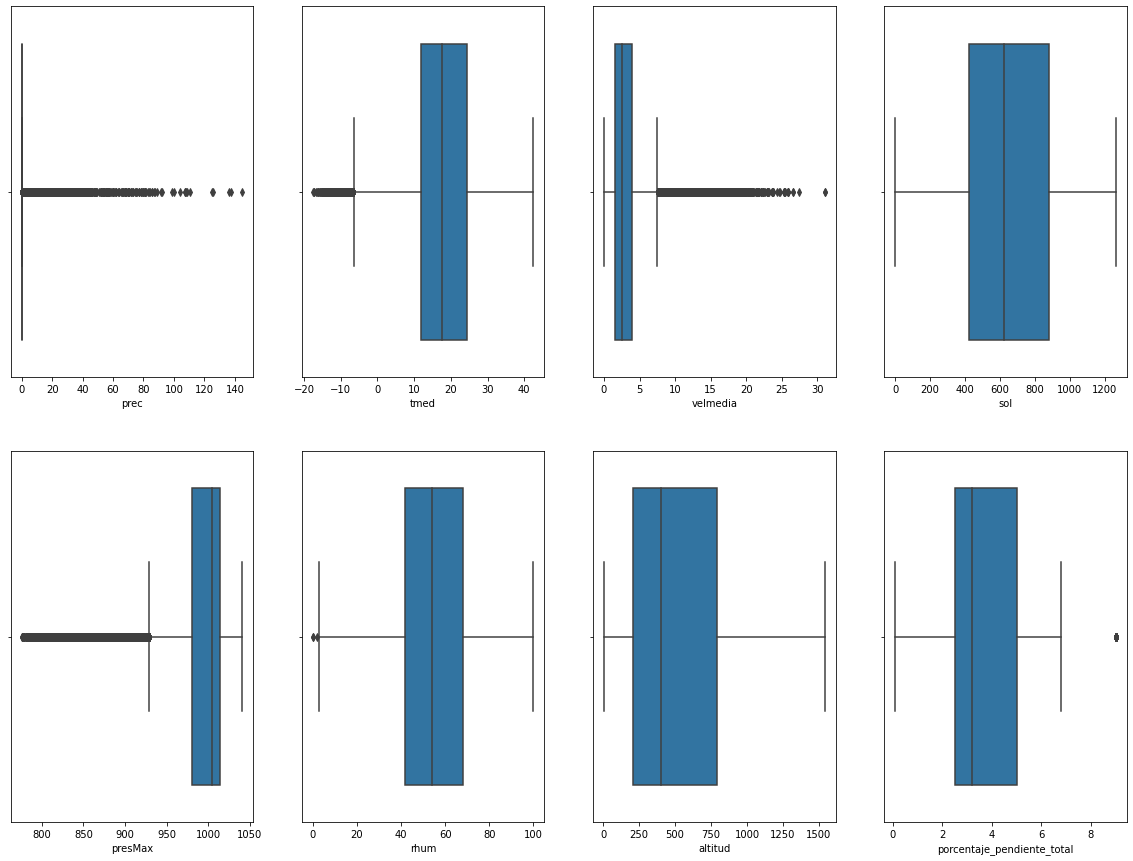

In [54]:
fig, axes = plt.subplots(2, 4)
fig.set_size_inches(20,15)

sns.boxplot(df_all['prec'], ax = axes[0,0])
sns.boxplot(df_all['tmed'], ax = axes[0,1])
sns.boxplot(df_all['velmedia'], ax = axes[0,2])
sns.boxplot(df_all['sol'], ax = axes[0,3])
sns.boxplot(df_all['presMax'], ax = axes[1,0])
sns.boxplot(df_all['rhum'], ax = axes[1,1])
sns.boxplot(df_all['altitud'], ax = axes[1,2])
sns.boxplot(df_all['porcentaje_pendiente_total'], ax = axes[1,3])

plt.show()

In [55]:
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

def remove_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df>(q1-1.5*IQR)) & (df<(q3+1.5*IQR)))]
    return outliers

# print(df_all['tmed'].shape)
# outliers = find_outliers_IQR(df_all['tmed'])

features = ['prec',	'tmax',	'tmed',	'tmin',	'velmedia',	'racha',	'sol',	'presMax',	'presMin',	'rhum',	'altitud',	'porcentaje_pendiente_total']

data = {}
for cod_estacion in series_estaciones:
  data[cod_estacion]={}
  for feature in features:
    print(series_estaciones[cod_estacion][feature])
    data[cod_estacion][feature] = find_outliers_IQR(series_estaciones[cod_estacion][feature])


# outliers = find_outliers_IQR(df_all['tmed'])
# outlier_temp = outliers.where(outliers < -10)

# outliers_dropped = outlier_temp.dropna().reset_index()
# outliers_dropped

Se han truncado las últimas 5000 líneas del flujo de salida.
2015-01-05    2.5
             ... 
2022-01-28    2.5
2022-01-29    2.5
2022-01-30    2.5
2022-01-31    2.5
2022-02-01    2.5
Name: porcentaje_pendiente_total, Length: 2584, dtype: float64
fecha
2015-01-01    0.0
2015-01-02    0.0
2015-01-03    0.0
2015-01-04    0.0
2015-01-05    0.0
             ... 
2019-10-06    0.0
2019-10-07    0.0
2019-10-08    0.0
2019-10-09    0.0
2019-10-10    0.0
Name: prec, Length: 1686, dtype: float64
fecha
2015-01-01     9.3
2015-01-02    11.0
2015-01-03    12.5
2015-01-04    12.0
2015-01-05    10.2
              ... 
2019-10-06    26.4
2019-10-07    24.5
2019-10-08    26.8
2019-10-09    23.0
2019-10-10    23.1
Name: tmax, Length: 1686, dtype: float64
fecha
2015-01-01     8.2
2015-01-02    10.0
2015-01-03    12.1
2015-01-04    11.4
2015-01-05     8.7
              ... 
2019-10-06    24.9
2019-10-07    23.5
2019-10-08    26.1
2019-10-09    22.4
2019-10-10    22.6
Name: tmed, Length: 1686, dtype: f

**Se muestran valores como outliers dentro de la variables por municipio, pero dada la naturaleza de los datos, se decide no eliminar ya que pueden existir estaciones climatologicas en distintas altitudes y los valores climatologicos tienen variables continuamente cambiantes en el tiempo.**

# Desbalanceo de Clases

**Se realiza un plot de desbalanceo de un municipio en concreto - Pendiente saber que tipo de plot se puede usar para visualizar el desbalanceo por estacion**

0    485316
1      3029
Name: ocurrencia, dtype: int64

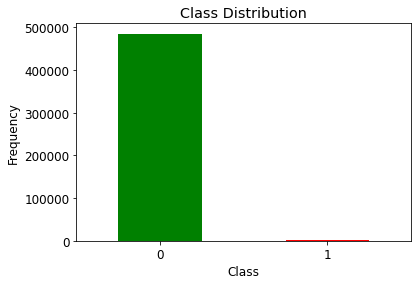

In [56]:
font = {'size'   : 12}
matplotlib.rc('font', **font)

pd.value_counts(df_all['ocurrencia']).plot.bar(rot=0, color=["green", "red"])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')

df_all['ocurrencia'].value_counts()

In [57]:
#Comprobamos el desbalanceo por estacion 
data = {}
for cod_estacion in series_estaciones:
  data[cod_estacion] = pd.value_counts(series_estaciones[cod_estacion]['ocurrencia'])

In [58]:
data

{'0002I': 0    1696
 1       7
 Name: ocurrencia, dtype: int64, 'WE': 0    2572
 1      12
 Name: ocurrencia, dtype: int64, 'WG': 0    2576
 1       8
 Name: ocurrencia, dtype: int64, 'WI': 0    2581
 1       4
 Name: ocurrencia, dtype: int64, 'WJ': 0    2575
 1      10
 Name: ocurrencia, dtype: int64, 'WK': 0    2569
 1      16
 Name: ocurrencia, dtype: int64, 'WL': 0    2536
 1      49
 Name: ocurrencia, dtype: int64, 'WM': 0    2569
 1      16
 Name: ocurrencia, dtype: int64, 'WN': 0    2571
 1      11
 Name: ocurrencia, dtype: int64, 'WD': 0    2566
 1      19
 Name: ocurrencia, dtype: int64, 'WO': 0    2547
 1      16
 Name: ocurrencia, dtype: int64, 'WQ': 0    2575
 1      10
 Name: ocurrencia, dtype: int64, 'WR': 0    2579
 1       3
 Name: ocurrencia, dtype: int64, 'WS': 0    2580
 1       5
 Name: ocurrencia, dtype: int64, 'WT': 0    2554
 1      30
 Name: ocurrencia, dtype: int64, 'WU': 0    2516
 1      69
 Name: ocurrencia, dtype: int64, 'WV': 0    2570
 1      15
 Name: oc

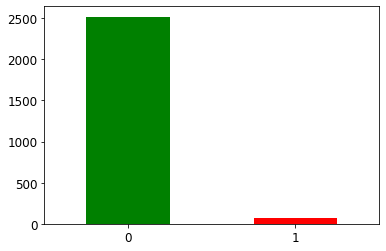

In [59]:
data['CW'].plot.bar(rot=0, color=["green", "red"])

# Analisis de las variables (Graficos)

## Grafico de Linea (Series temporales)

**Lo he hecho para un municipio en concreto, pero lo ideal seria hacerlo para todos.  - Pendiente de modificar**

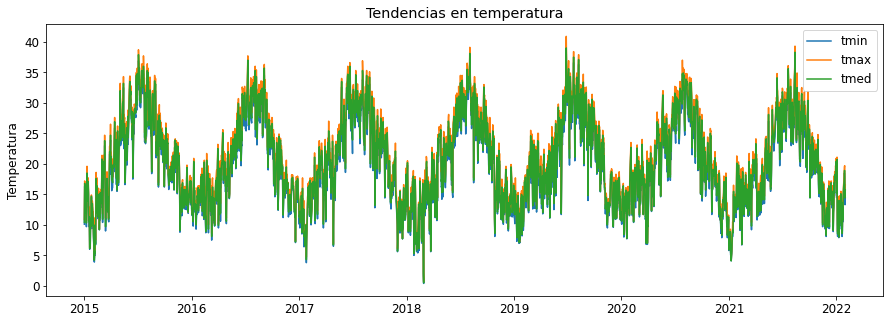

In [62]:
fig,eje= plt.subplots(figsize=(15,5))
for i in ["tmin", "tmax", "tmed"]:
    eje.plot(series_estaciones['D3'][i],label=i)
    eje.legend()
    eje.set_ylabel('Temperatura')
    eje.set_title('Tendencias en temperatura')

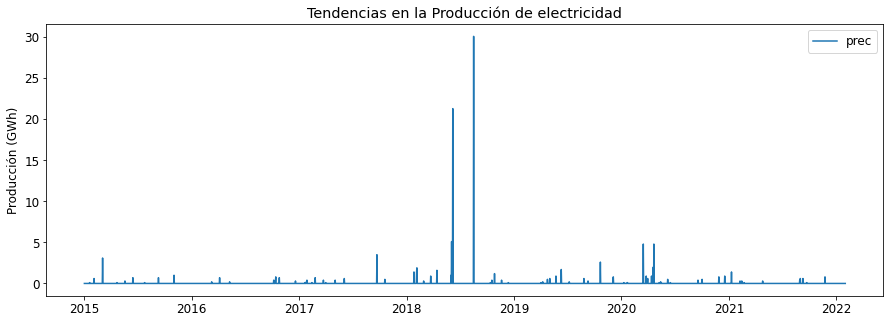

In [63]:
fig,eje= plt.subplots(figsize=(15,5))
for i in ["prec"]:
    eje.plot(series_estaciones['D3'][i],label=i)
    eje.legend()
    eje.set_ylabel('Producción (GWh)')
    eje.set_title('Tendencias en la Producción de electricidad')

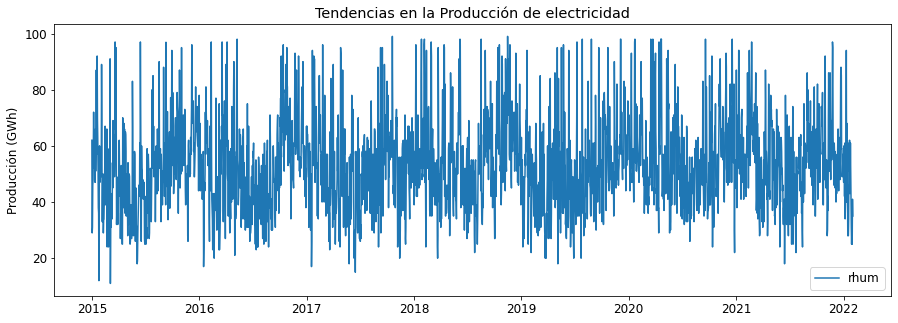

In [64]:
fig,eje= plt.subplots(figsize=(15,5))
for i in ["rhum"]:
    eje.plot(series_estaciones['D3'][i],label=i)
    eje.legend()
    eje.set_ylabel('Producción (GWh)')
    eje.set_title('Tendencias en la Producción de electricidad')

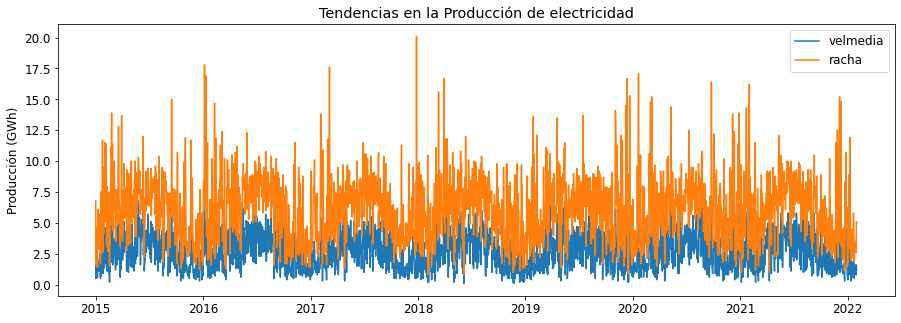

In [65]:
fig,eje= plt.subplots(figsize=(15,5))
for i in ["velmedia", "racha"]:
    eje.plot(series_estaciones['D3'][i],label=i)
    eje.legend()
    eje.set_ylabel('Producción (GWh)')
    eje.set_title('Tendencias en la Producción de electricidad')

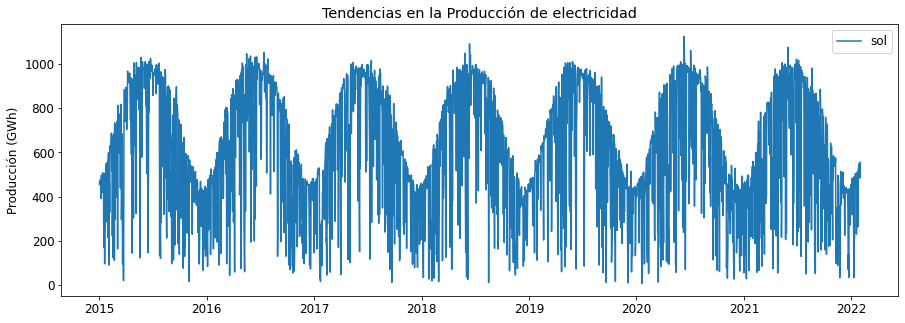

In [66]:
fig,eje= plt.subplots(figsize=(15,5))
for i in ["sol"]:
    eje.plot(series_estaciones['D3'][i],label=i)
    eje.legend()
    eje.set_ylabel('Producción (GWh)')
    eje.set_title('Tendencias en la Producción de electricidad')

Se puede observar una estacionalidad en los datos, ya que tienen curvas parecidas durante un año con respecto a otro

##Histogramas


In [67]:
df_all

,indicativo,prec,tmax,tmed,tmin,velmedia,racha,sol,presMax,presMin,rhum,altitud,porcentaje_pendiente_total,alto_riesgo,peligro,vulner,ocurrencia,municipio,cod_municipio,total_viajes_estacion,total_viajes_km_estacion,laborable,dayofyear,weekend,mes
fecha,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01,0002I,0.0,12.4,12.1,11.9,0.3,8.3,457.0,1020.7,1020.1,63.0,281.0,2.50,Sí,Molt Alt,Molt Alta,0,Vandellos l’Hospitalet de l’Infant,43162,0.0,0.0,3,1,0,1
2015-01-01,WE,0.0,11.3,11.1,10.7,5.3,7.8,449.0,1027.2,1021.7,58.0,181.0,3.22,Sí,Alt,Molt Alta,0,Vilanova del Vallès,8946,0.0,0.0,3,1,0,1
2015-01-01,WG,0.0,8.5,8.1,7.6,0.8,2.3,428.0,1020.0,1019.6,52.0,358.0,6.80,Sí,Molt Alt,Moderada,0,Algerri,25528,0.0,0.0,3,1,0,1
2015-01-01,WI,0.0,7.8,7.6,7.4,2.1,4.1,468.0,1031.5,1031.3,32.0,397.0,9.00,Sí,Molt Alt,Baixa,0,Maials,25761,0.0,0.0,3,1,0,1
2015-01-01,WJ,0.0,12.3,11.7,11.3,1.0,2.4,449.0,1000.2,999.7,60.0,226.0,2.50,Sí,Molt Alt,Moderada,0,El Masroig,43675,0.0,0.0,3,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-01,UN,0.0,14.8,14.3,14.0,1.4,3.5,526.0,954.0,953.8,49.0,160.0,2.90,Sí,Alt,Alta,0,Cassà de la Selva,17462,0.0,0.0,1,32,0,2
2022-02-01,UO,0.0,14.0,13.7,13.3,5.5,10.2,574.0,1023.8,1023.4,56.0,143.0,3.50,Sí,Exclos,Moderada,0,Fornells de la Selva,17466,0.0,0.0,1,32,0,2
2022-02-01,UP,0.0,13.6,13.3,13.1,2.2,4.3,544.0,1013.9,1013.6,46.0,259.0,1.70,Sí,Exclos,Molt Alta,0,Cabrils,8489,0.0,0.0,1,32,0,2


In [68]:
mun_con_incendios = df_mun_sin_incendios[df_mun_sin_incendios['ocurrencia'] >=1]
mun_con_incendios['ocurrencia']

cod_municipio
8158     640
25866    539
8315     528
43387    469
8930     420
        ... 
25807      2
25138      1
25119      1
25879      1
43225      1
Name: ocurrencia, Length: 185, dtype: int64

In [69]:
df_all[df_all['ocurrencia'] ==1].groupby(by=["weekend"]).count()

,indicativo,prec,tmax,tmed,tmin,velmedia,racha,sol,presMax,presMin,rhum,altitud,porcentaje_pendiente_total,alto_riesgo,peligro,vulner,ocurrencia,municipio,cod_municipio,total_viajes_estacion,total_viajes_km_estacion,laborable,dayofyear,mes
weekend,,,,,,,,,,,,,,,,,,,,,,,,
0,2129,2129,2129,2129,2129,2129,2129,2129,2129,2129,2129,2129,2129,2129,2129,2129,2129,2129,2129,2129,2129,2129,2129,2129
1,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900,900


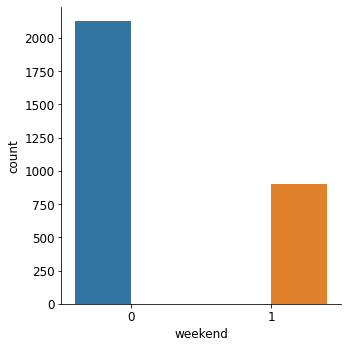

In [70]:
sns.catplot(x = "weekend", data = df_all[df_all['ocurrencia'] ==1], kind = "count", hue = "weekend")

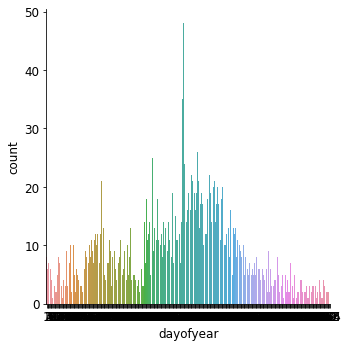

In [71]:
sns.catplot(x = "dayofyear", data = df_all[df_all['ocurrencia'] ==1], kind = "count")

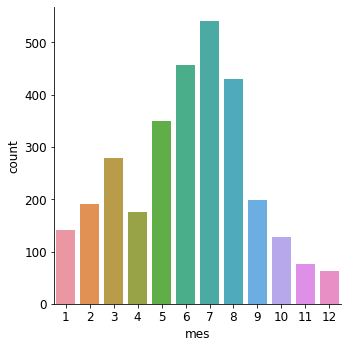

In [72]:
sns.catplot(x = "mes", data = df_all[df_all['ocurrencia'] ==1], kind = "count");

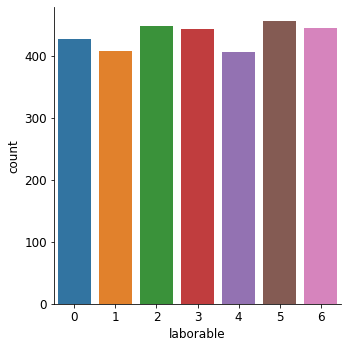

In [73]:
sns.catplot(x = "laborable", data = df_all[df_all['ocurrencia'] ==1], kind = "count");

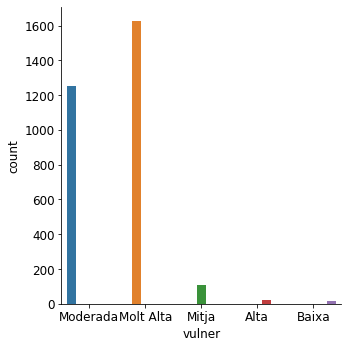

In [74]:
sns.catplot(x = "vulner", data = df_all[df_all['ocurrencia'] ==1], kind = "count", hue = "vulner")

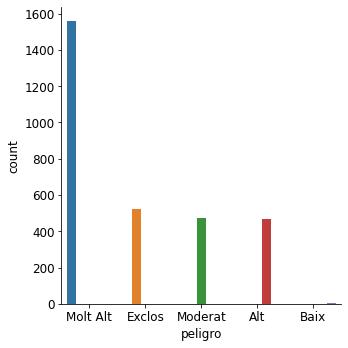

In [75]:
sns.catplot(x = "peligro", data = df_all[df_all['ocurrencia'] ==1], kind = "count", hue = "peligro")

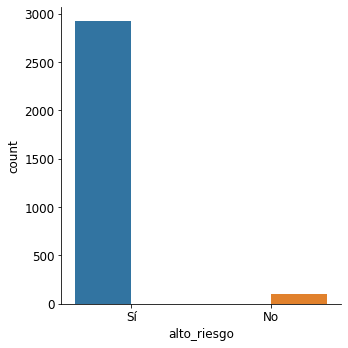

In [76]:
sns.catplot(x = "alto_riesgo", data = df_all[df_all['ocurrencia'] ==1], kind = "count", hue = "alto_riesgo")

## Matriz de correlación:

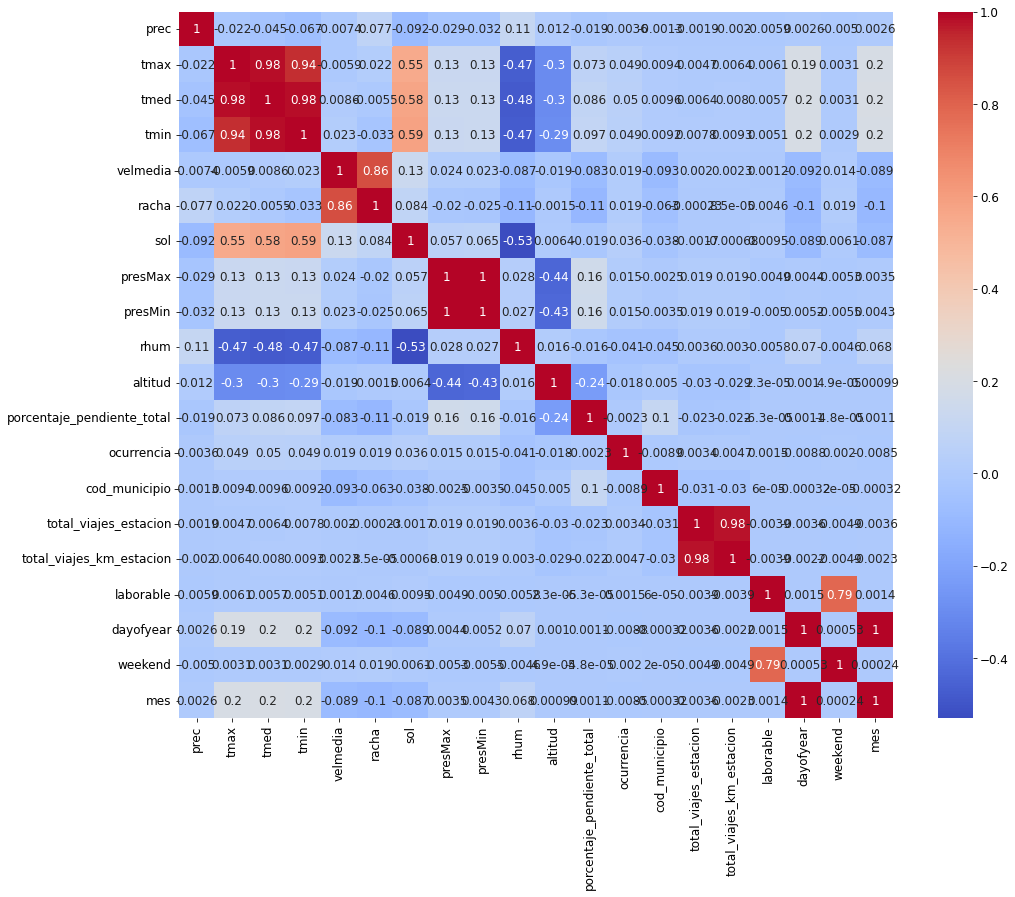

In [77]:
# Matriz de correlación:
fig, ax = plt.subplots(figsize = (16, 13))
sns.heatmap(df_all.corr(), annot = True, cmap = 'coolwarm', ax =ax);

Teniendo en cuenta las correlaciones, se descartaran las variables altamente correlacionadas entre las cuales están:

+ tmin, tmax, presMin, total_viajes_km_estacion. 

# Autocorrelaciones

Para analizar si una serie es estacionaria, se puede analizar el correlograma y el autocorrelograma, donde se ve que la serie tiene fuerte autocorrelación y autocorrelación parcial:

El área sombreada en el gráfico representa la signifación de los valores de la autocorrelación indicando si son significativamente distintos de cero. Como cada valor de autocorrelación está por encima del área sombreada, esto indica que los coeficientes de autocorrelación son significativos.

La mayoría de los coeficientes de autocorrelación no son significativos porque están dentro del área sombreada. Esto indica que no hay autocorrelación para ningún retraso. Esto es uno de los supuestos del Ruido Blanco.


In [78]:
def correlogramas():
    fig, axs = plt.subplots(1, 2, figsize=(25, 10))
    sm.graphics.tsa.plot_acf(df_all['velmedia'].values.squeeze(), ax=axs[0], title=(f"Autocorrelacion ({'velmedia'})"), lags=60)
    sm.graphics.tsa.plot_pacf(df_all['velmedia'].values.squeeze(), ax=axs[1], title=(f"Autocorrelacion Parcial ({'velmedia'})"), lags=60)
    plt.grid(color='gray', linestyle='-', linewidth=1)
    plt.show()


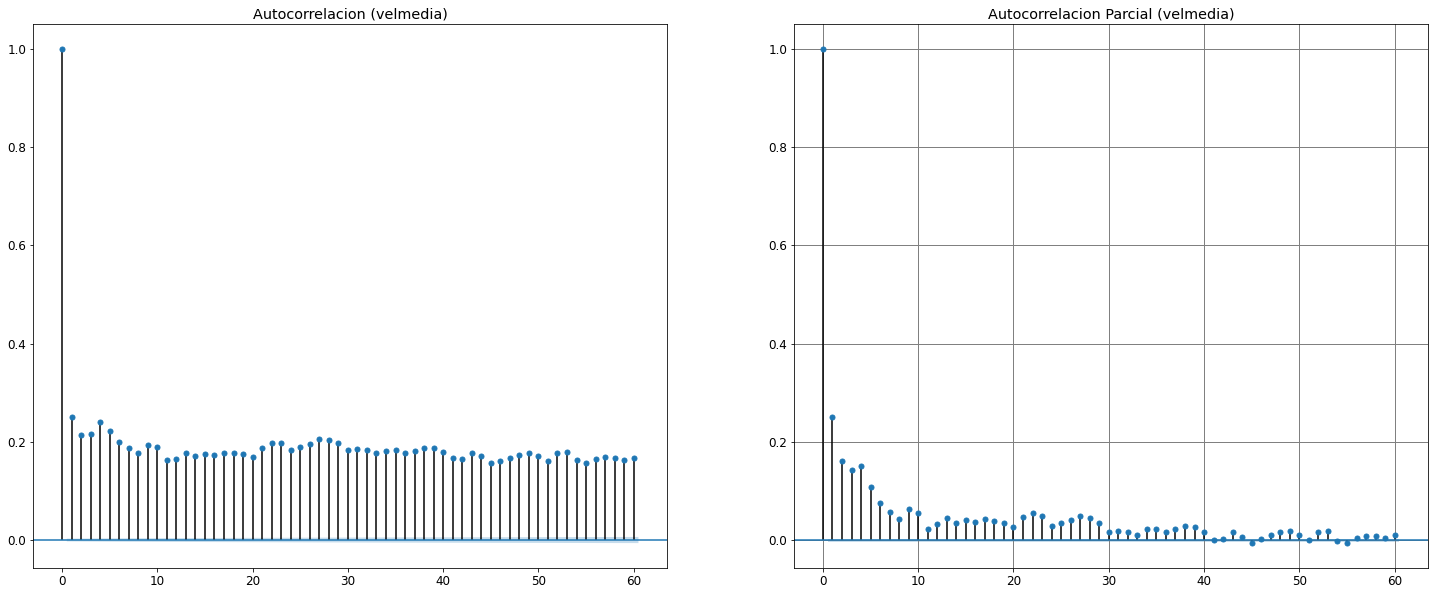

In [79]:
correlogramas()

In [80]:

def correlogramas():
    fig, axs = plt.subplots(1, 2, figsize=(25, 10))
    sm.graphics.tsa.plot_acf(df_all['prec'].values.squeeze(), ax=axs[0], title=(f"Autocorrelacion ({'prec'})"), lags=60)
    sm.graphics.tsa.plot_pacf(df_all['prec'].values.squeeze(), ax=axs[1], title=(f"Autocorrelacion Parcial ({'prec'})"), lags=60)
    plt.grid(color='gray', linestyle='-', linewidth=1)
    plt.show()


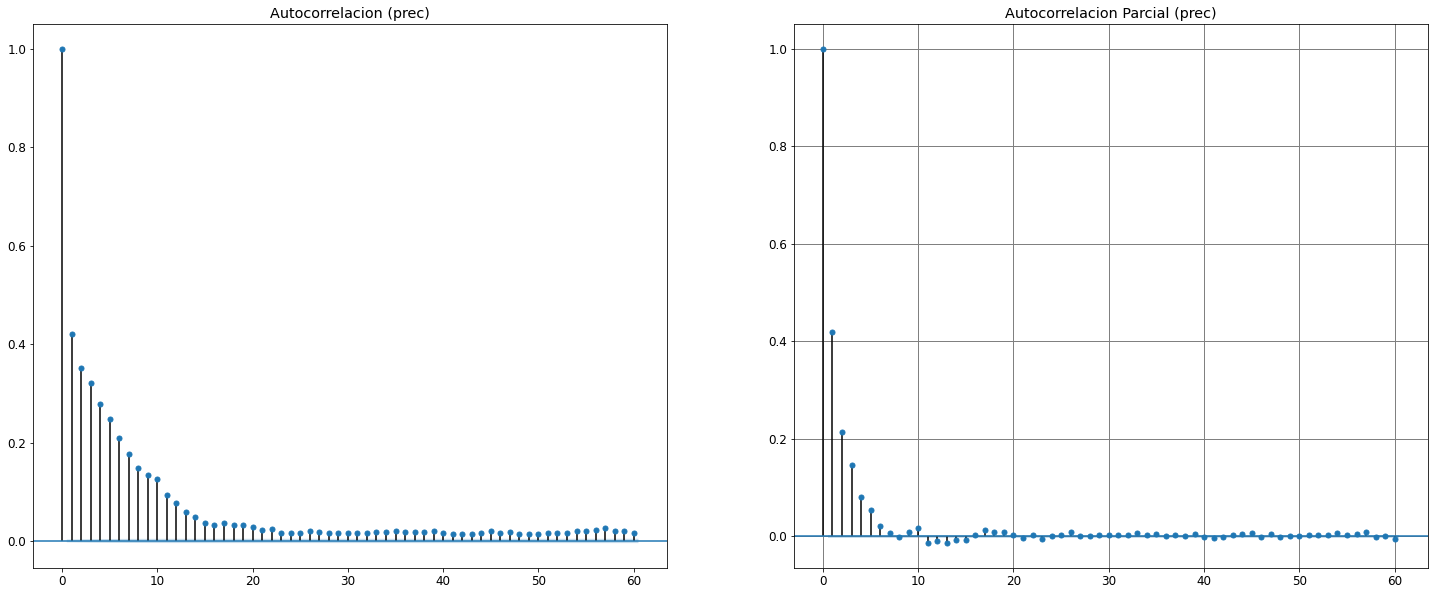

In [81]:
correlogramas()

In [82]:
def correlogramas():
    fig, axs = plt.subplots(1, 2, figsize=(25, 10))
    sm.graphics.tsa.plot_acf(df_all['tmed'].values.squeeze(), ax=axs[0], title=(f"Autocorrelacion ({'temp media'})"), lags=60)
    sm.graphics.tsa.plot_pacf(df_all['tmed'].values.squeeze(), ax=axs[1], title=(f"Autocorrelacion Parcial ({'temp media'})"), lags=60)
    plt.grid(color='gray', linestyle='-', linewidth=1)
    plt.show()

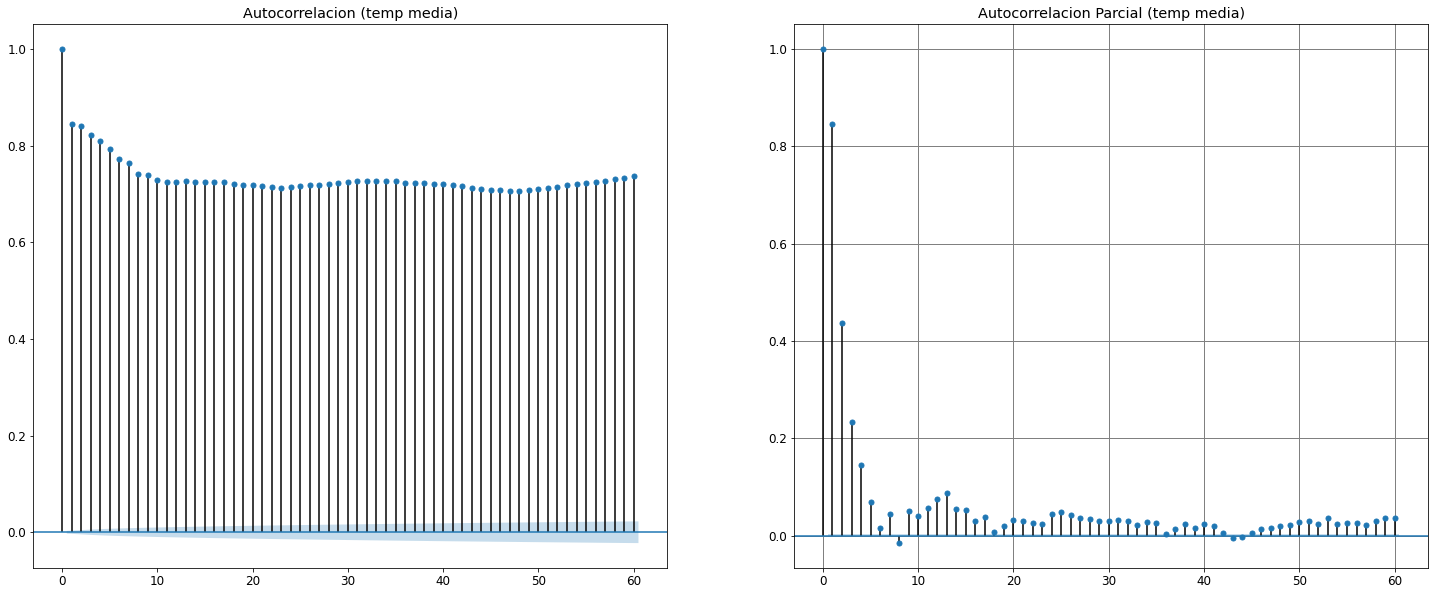

In [83]:
correlogramas()

In [84]:
def correlogramas():
    fig, axs = plt.subplots(1, 2, figsize=(25, 10))
    sm.graphics.tsa.plot_acf(df_all['sol'].values.squeeze(), ax=axs[0], title=(f"Autocorrelacion ({'sol'})"), lags=60)
    sm.graphics.tsa.plot_pacf(df_all['sol'].values.squeeze(), ax=axs[1], title=(f"Autocorrelacion Parcial ({'sol'})"), lags=60)
    plt.grid(color='gray', linestyle='-', linewidth=1)
    plt.show()

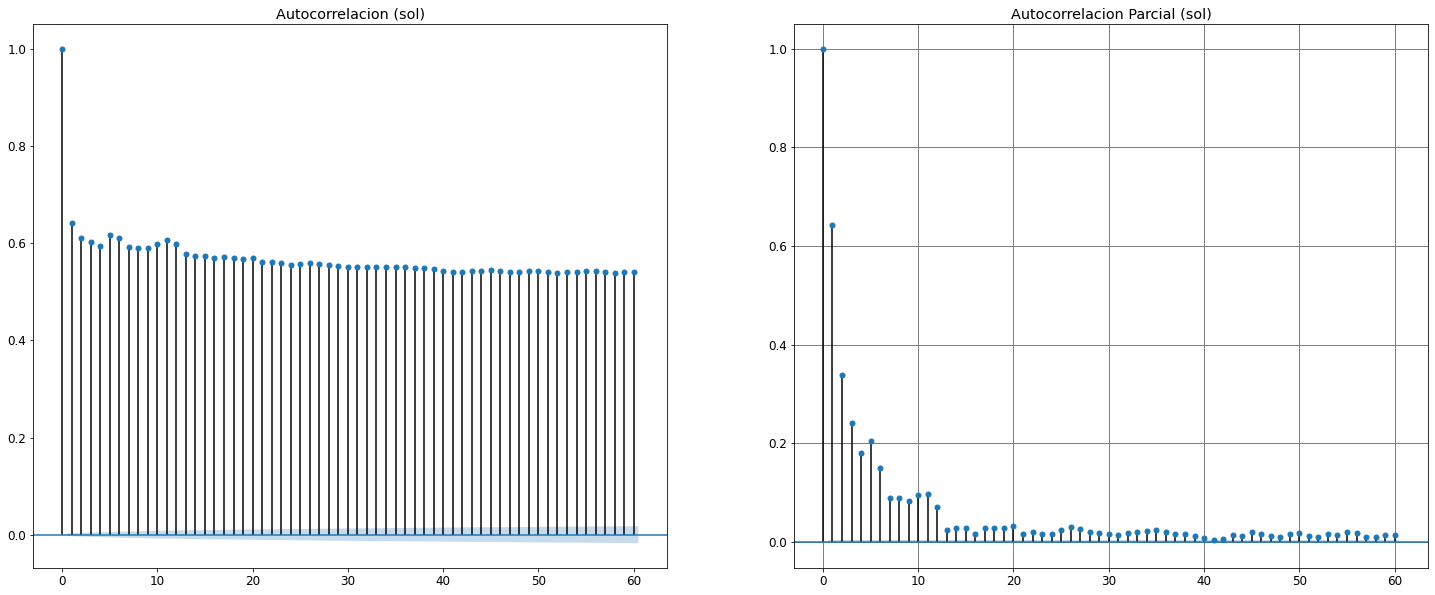

In [85]:
correlogramas()

In [86]:
def correlogramas():
    fig, axs = plt.subplots(1, 2, figsize=(25, 10))
    sm.graphics.tsa.plot_acf(df_all['rhum'].values.squeeze(), ax=axs[0], title=(f"Autocorrelacion ({'humedad_relativa'})"), lags=60)
    sm.graphics.tsa.plot_pacf(df_all['rhum'].values.squeeze(), ax=axs[1], title=(f"Autocorrelacion Parcial ({'humedad_relativa'})"), lags=60)
    plt.grid(color='gray', linestyle='-', linewidth=1)
    plt.show()

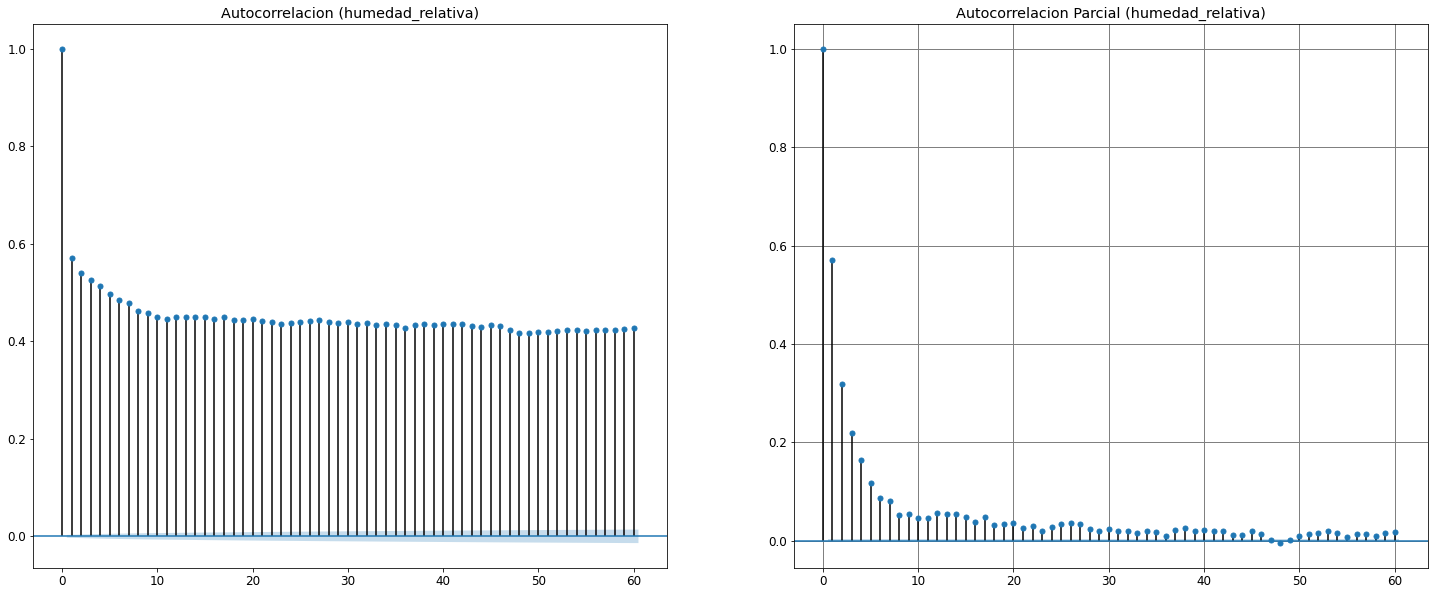

In [87]:
correlogramas()

In [88]:
def correlogramas():
    fig, axs = plt.subplots(1, 2, figsize=(25, 10))
    sm.graphics.tsa.plot_acf(df_all['racha'].values.squeeze(), ax=axs[0], title=(f"Autocorrelacion ({'racha'})"), lags=60)
    sm.graphics.tsa.plot_pacf(df_all['racha'].values.squeeze(), ax=axs[1], title=(f"Autocorrelacion Parcial ({'racha'})"), lags=60)
    plt.grid(color='gray', linestyle='-', linewidth=1)
    plt.show()

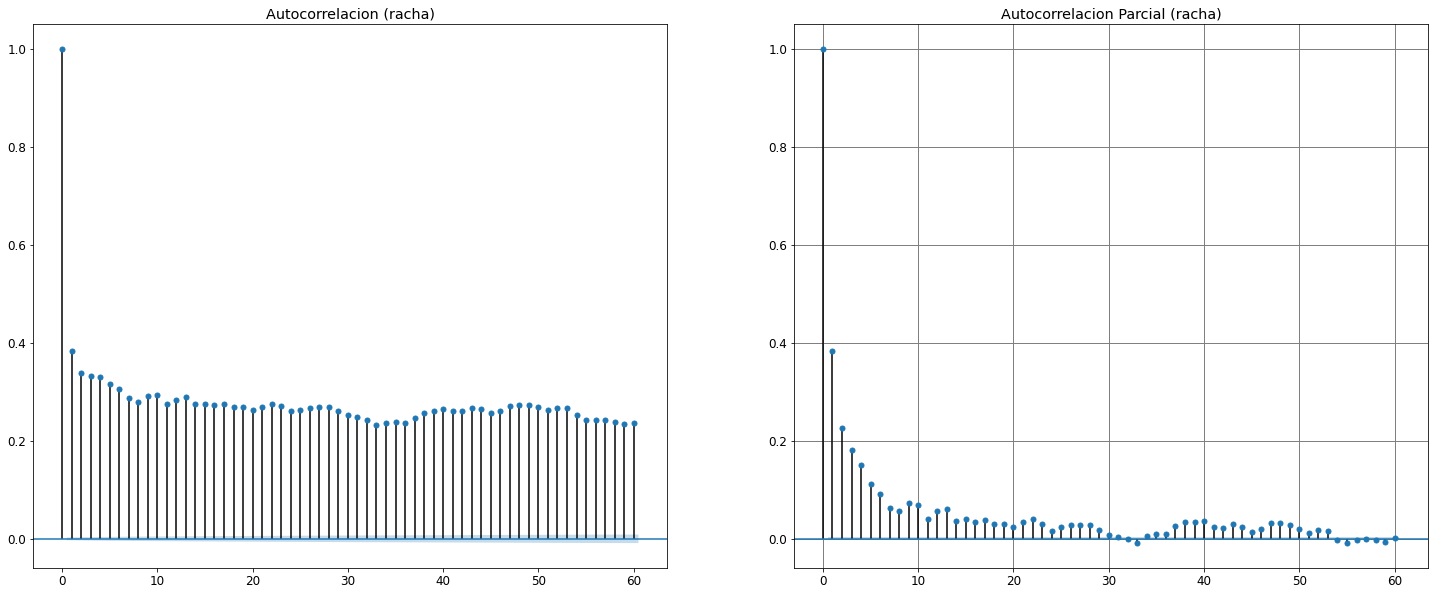

In [89]:
correlogramas()

In [90]:
def correlogramas():
    fig, axs = plt.subplots(1, 2, figsize=(25, 10))
    sm.graphics.tsa.plot_acf(df_all['total_viajes_estacion'].values.squeeze(), ax=axs[0], title=(f"Autocorrelacion ({'total_viajes_estacion'})"), lags=100)
    sm.graphics.tsa.plot_pacf(df_all['total_viajes_estacion'].values.squeeze(), ax=axs[1], title=(f"Autocorrelacion Parcial ({'total_viajes_estacion'})"), lags=100)
    plt.grid(color='gray', linestyle='-', linewidth=1)
    plt.show()

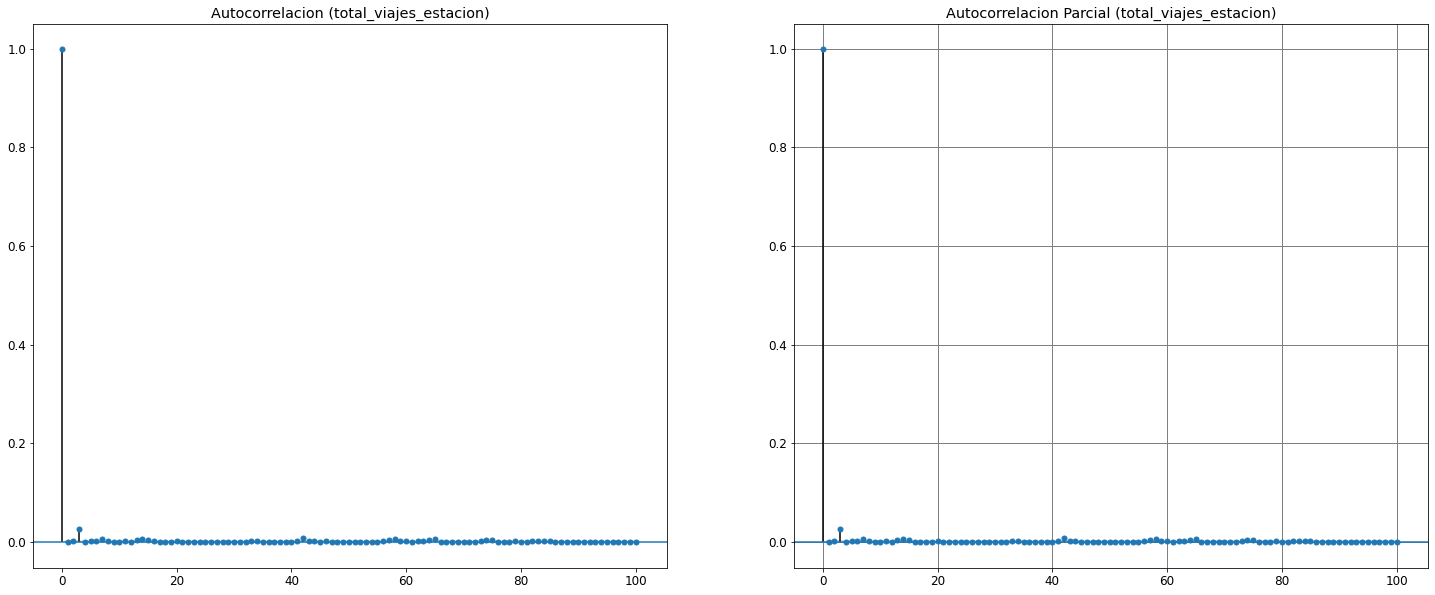

In [91]:
correlogramas()

El eje x muestra el número de retrasos y el eje y muestra la autocorrelación en ese número de retrasos. De forma predeterminada, la gráfica comienza en lag = 0 y la autocorrelación siempre será 1 en lag = 0.

# Linealidad Levene test

Para determinar si es necesario o no balancear las clases dentro de mi variable y

Linealidad entre las variables dependientes e independiente, si es lineal, balancear es de utilidad, en caso contrario no sería necesario

In [92]:
from scipy.stats import levene
from scipy import stats

In [93]:
myTarget =  df_all['ocurrencia'] 

scale_tmed = df_all['tmed']
scale_tmin = df_all['tmin']
scale_tmax = df_all['tmax']
scale_presMin = df_all['presMin']
scale_presMax = df_all['presMax']
scale_velmedia = df_all['velmedia']
scale_racha = df_all['racha']
scale_prec = df_all['prec']
scale_sol = df_all['sol']
scale_rhum = df_all['rhum']
scale_altitud = df_all['altitud']
scale_pendiente = df_all['porcentaje_pendiente_total']
scale_alto_riesgo = df_all['alto_riesgo']
scale_peligro = df_all['peligro']
scale_vulner = df_all['vulner']
scale_laborable = df_all['laborable']
scale_dayofyear = df_all['dayofyear']
scale_weekend = df_all['weekend']
scale_mes = df_all['mes']

In [94]:
cat1 = myTarget == 1
cat2 = myTarget == 0

Score_tmed1 = scale_tmed[cat1]
Score_tmed2 = scale_tmed[cat2]

Score_tmin1 = scale_tmin[cat1]
Score_tmin2 = scale_tmin[cat2]

Score_tmax1 = scale_tmax[cat1]
Score_tmax2 = scale_tmax[cat2]

scale_presMin1 = scale_presMin[cat1]
scale_presMin2 = scale_presMin[cat2]

scale_presMax1 = scale_presMax[cat1]
scale_presMax2 = scale_presMax[cat2]

scale_velmedia1 = scale_velmedia[cat1]
scale_velmedia2 = scale_velmedia[cat2]

scale_racha1 = scale_racha[cat1]
scale_racha2 = scale_racha[cat2]

scale_prec1 = scale_prec[cat1]
scale_prec2 = scale_prec[cat2]

scale_sol1 = scale_sol[cat1]
scale_sol2 = scale_sol[cat2]

scale_rhum1 = scale_rhum[cat1]
scale_rhum2 = scale_rhum[cat2]

scale_altitud1 = scale_altitud[cat1]
scale_altitud2 = scale_altitud[cat2]

scale_pendiente1 = scale_pendiente[cat1]
scale_pendiente2 = scale_pendiente[cat2]

scale_laborable1 = scale_laborable[cat1]
scale_laborable2 = scale_laborable[cat2]

scale_dayofyear1 = scale_dayofyear[cat1]
scale_dayofyear2 = scale_dayofyear[cat2]

scale_weekend1 = scale_weekend[cat1]
scale_weekend2 = scale_weekend[cat2]

scale_mes1 = scale_mes[cat1]
scale_mes2 = scale_mes[cat2]

In [95]:
levene_test_mean =stats.levene(Score_tmed1, Score_tmed2, center ='mean')
print(levene_test_mean)

levene_test_mean =stats.levene(Score_tmin1, Score_tmin2, center ='mean')
print(levene_test_mean)

levene_test_mean =stats.levene(Score_tmax1, Score_tmax2, center ='mean')
print(levene_test_mean)

levene_test_mean =stats.levene(scale_presMin1, scale_presMin2, center ='mean')
print(levene_test_mean)

levene_test_mean =stats.levene(scale_presMax1, scale_presMax2, center ='mean')
print(levene_test_mean)

levene_test_mean =stats.levene(scale_velmedia1, scale_velmedia2, center ='mean')
print(levene_test_mean)

levene_test_mean =stats.levene(scale_racha1, scale_racha2, center ='mean')
print(levene_test_mean)

levene_test_mean =stats.levene(scale_prec1, scale_prec2, center ='mean')
print(levene_test_mean)

levene_test_mean =stats.levene(scale_sol1, scale_sol2, center ='mean')
print(levene_test_mean)

levene_test_mean =stats.levene(scale_rhum1, scale_rhum2, center ='mean')
print(levene_test_mean)

levene_test_mean =stats.levene(scale_laborable1, scale_laborable2, center ='mean')
print(levene_test_mean)

levene_test_mean =stats.levene(scale_dayofyear1, scale_dayofyear2, center ='mean')
print(levene_test_mean)

levene_test_mean =stats.levene(scale_weekend1, scale_weekend2, center ='mean')
print(levene_test_mean)

levene_test_mean =stats.levene(scale_mes1, scale_mes2, center ='mean')
print(levene_test_mean)

LeveneResult(statistic=61.260743447882966, pvalue=5.009426025070813e-15)
LeveneResult(statistic=45.20832068893589, pvalue=1.7734439304298758e-11)
LeveneResult(statistic=77.0901322959756, pvalue=1.6384180988454747e-18)
LeveneResult(statistic=239.0893137819949, pvalue=6.398651820070175e-54)
LeveneResult(statistic=238.84366123027863, pvalue=7.238131117095777e-54)
LeveneResult(statistic=4.427243317735511, pvalue=0.03537009984387596)
LeveneResult(statistic=12.59079712261856, pvalue=0.00038768711838983277)
LeveneResult(statistic=21.82446396669535, pvalue=2.9884580745508586e-06)
LeveneResult(statistic=181.3696134442378, pvalue=2.476146999742517e-41)
LeveneResult(statistic=134.0250274029418, pvalue=5.4456839156336945e-31)
LeveneResult(statistic=0.03477259163109016, pvalue=0.8520730617730103)
LeveneResult(statistic=880.9691222968208, pvalue=2.0030420784005871e-193)
LeveneResult(statistic=7.625941315138074, pvalue=0.005753678093159656)
LeveneResult(statistic=924.7262433003605, pvalue=6.412135918

H0: varianzas de todos los grupos son iguales.

H1. al menos una varianza distinta entre todos los grupos.

Se muestran evidencias para rechazar la hipótesis de que los dos grupos tienen la misma varianza, heterocedasticidad. p-value es inferior a 0.05.  Por lo tanto, la hipótesis nula de igualdad de varianzas se rechaza y se concluye que hay una diferencia entre las variaciones.


# Se crea un df con todos los datos, y se crea otro dataframe sin movilidad.
+ En el primero df_all dejaremos solo los datos que tienen movilidad (eliminamos usando dropna)
+ En el segundo df_sin_movilidad dejaremos todos los datos, excepto los que no tienen datos de pendiente. (eliminamos usando dropna)

In [60]:
df_sin_movilidad = df_all.drop('total_viajes_estacion', axis=1)
df_sin_movilidad = df_sin_movilidad.drop('total_viajes_km_estacion', axis=1)

In [61]:
df_sin_movilidad.head()

,indicativo,prec,tmax,tmed,tmin,velmedia,racha,sol,presMax,presMin,rhum,altitud,porcentaje_pendiente_total,alto_riesgo,peligro,vulner,ocurrencia,municipio,cod_municipio,laborable,dayofyear,weekend,mes
fecha,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01,0002I,0.0,12.4,12.1,11.9,0.3,8.3,457.0,1020.7,1020.1,63.0,281.0,2.50,Sí,Molt Alt,Molt Alta,0,Vandellos l’Hospitalet de l’Infant,43162,3,1,0,1
2015-01-01,WE,0.0,11.3,11.1,10.7,5.3,7.8,449.0,1027.2,1021.7,58.0,181.0,3.22,Sí,Alt,Molt Alta,0,Vilanova del Vallès,8946,3,1,0,1
2015-01-01,WG,0.0,8.5,8.1,7.6,0.8,2.3,428.0,1020.0,1019.6,52.0,358.0,6.80,Sí,Molt Alt,Moderada,0,Algerri,25528,3,1,0,1
2015-01-01,WI,0.0,7.8,7.6,7.4,2.1,4.1,468.0,1031.5,1031.3,32.0,397.0,9.00,Sí,Molt Alt,Baixa,0,Maials,25761,3,1,0,1
2015-01-01,WJ,0.0,12.3,11.7,11.3,1.0,2.4,449.0,1000.2,999.7,60.0,226.0,2.50,Sí,Molt Alt,Moderada,0,El Masroig,43675,3,1,0,1


In [62]:
df_sin_movilidad.isnull().sum()

indicativo                    0
prec                          0
tmax                          0
tmed                          0
tmin                          0
velmedia                      0
racha                         0
sol                           0
presMax                       0
presMin                       0
rhum                          0
altitud                       0
porcentaje_pendiente_total    0
alto_riesgo                   0
peligro                       0
vulner                        0
ocurrencia                    0
municipio                     0
cod_municipio                 0
laborable                     0
dayofyear                     0
weekend                       0
mes                           0
dtype: int64

In [63]:
df_sin_movilidad.shape, df_all.shape

((488345, 23), (488345, 25))

In [64]:
df_sin_movilidad[df_sin_movilidad.duplicated(keep=False)]

,indicativo,prec,tmax,tmed,tmin,velmedia,racha,sol,presMax,presMin,rhum,altitud,porcentaje_pendiente_total,alto_riesgo,peligro,vulner,ocurrencia,municipio,cod_municipio,laborable,dayofyear,weekend,mes
fecha,,,,,,,,,,,,,,,,,,,,,,,


In [65]:
df_sin_movilidad = df_sin_movilidad.drop_duplicates(
    subset=['prec',	'tmax',	'tmed',	'tmin',	'velmedia',	'racha',	'sol',	'presMax',	'presMin',	'rhum',	'altitud',	'porcentaje_pendiente_total',	'alto_riesgo'	,'peligro',	'vulner',	'ocurrencia',	'municipio'	,'indicativo'	,'cod_municipio'], keep="first")

In [66]:
df_all = df_all.drop_duplicates(
    subset=['prec',	'tmax',	'tmed',	'tmin',	'velmedia',	'racha',	'sol',	'presMax',	'presMin',	'rhum',	'altitud',	'porcentaje_pendiente_total',	'alto_riesgo'	,'peligro',	'vulner',	'ocurrencia',	'municipio'	,'indicativo'	,'cod_municipio'], keep="first")

In [67]:
df_sin_movilidad.shape, df_all.shape

((488345, 23), (488345, 25))

In [68]:
df_all.isnull().sum()

indicativo                    0
prec                          0
tmax                          0
tmed                          0
tmin                          0
velmedia                      0
racha                         0
sol                           0
presMax                       0
presMin                       0
rhum                          0
altitud                       0
porcentaje_pendiente_total    0
alto_riesgo                   0
peligro                       0
vulner                        0
ocurrencia                    0
municipio                     0
cod_municipio                 0
total_viajes_estacion         0
total_viajes_km_estacion      0
laborable                     0
dayofyear                     0
weekend                       0
mes                           0
dtype: int64

In [69]:
df_all_20_21 = pd.DataFrame(df_all)

In [70]:
df_all_20_21.dropna(inplace=True)

In [71]:
df_sin_movilidad_20_21 = pd.DataFrame(df_all_20_21)

In [72]:
df_sin_movilidad_20_21 = df_sin_movilidad_20_21.drop('total_viajes_estacion', axis=1)
df_sin_movilidad_20_21 = df_sin_movilidad_20_21.drop('total_viajes_km_estacion', axis=1)
df_sin_movilidad_20_21.shape

(488345, 23)

In [73]:
df_all.shape, df_sin_movilidad.shape, df_all_20_21.shape, df_sin_movilidad_20_21.shape

((488345, 25), (488345, 23), (488345, 25), (488345, 23))

# Division de los datos

In [74]:
df_train = df_all.loc['2015-01-01':'2020-12-31'] # 6 años de train
df_test = df_all.loc['2021-01-01':'2022-12-31']  # 1 año y medio de test

X_train = df_train.drop(['ocurrencia', 'municipio', 'cod_municipio', 'indicativo'], axis=1)
y_train = df_train['ocurrencia']

X_test = df_test.drop(['ocurrencia', 'municipio', 'cod_municipio', 'indicativo'], axis=1)
y_test = df_test['ocurrencia']

In [75]:
df_train.shape, y_train.shape, df_test.shape, y_test.shape

((413052, 25), (413052,), (75293, 25), (75293,))

In [76]:
# normalizacion de los datos numericos
from sklearn.preprocessing import StandardScaler
numericalCols_train = df_train[["prec","tmed","velmedia","sol","presMax","rhum", "altitud", "porcentaje_pendiente_total",'total_viajes_estacion']]
numericalCols_test = df_test[["prec","tmed","velmedia","sol","presMax","rhum", "altitud", "porcentaje_pendiente_total", 'total_viajes_estacion']]

scaler = StandardScaler()
scaler.fit(numericalCols_train)

numericalCols_train_scaled = scaler.transform(numericalCols_train)
numericalCols_test_scaled = scaler.transform(numericalCols_test)

numericalCols_train_scaled.shape , numericalCols_test_scaled.shape

((413052, 9), (75293, 9))

In [77]:
# normalizacion de los datos categoricos , sin la ocurrencia
from sklearn.preprocessing import OneHotEncoder
categoricalCols_train = df_train[['alto_riesgo',	'peligro',	'vulner']]  #alto_riesgo	peligro	vulner
categoricalCols_train = OneHotEncoder().fit_transform(categoricalCols_train).toarray()

# normalizacion de los datos categoricos , sin la ocurrencia
from sklearn.preprocessing import OneHotEncoder
categoricalCols_test = df_test[['alto_riesgo',	'peligro',	'vulner']]  #alto_riesgo	peligro	 y vulner
categoricalCols_test = OneHotEncoder().fit_transform(categoricalCols_test).toarray()

categoricalCols_train.shape, categoricalCols_test.shape

((413052, 12), (75293, 12))

In [78]:
Other_var_train = df_train[['laborable', 	'dayofyear', 	'weekend', 	'mes']]
Other_var_test = df_test[['laborable', 	'dayofyear', 	'weekend', 	'mes']]  #alto_riesgo	peligro	 y vulner

In [79]:
df_train_scaled = np.concatenate((numericalCols_train_scaled , categoricalCols_train, Other_var_train), axis=1)
df_test_scaled = np.concatenate((numericalCols_test_scaled , categoricalCols_test, Other_var_test), axis=1)

In [80]:
df_train_scaled.shape, y_train.shape, df_test_scaled.shape, y_test.shape

((413052, 25), (413052,), (75293, 25), (75293,))

In [81]:
X_test = df_test_scaled
X_train = df_train_scaled

#Modelos

##Decision Tree


Conjunto de datos de validación
  Precisión:     0.99280
  Exactitud:     0.49643
  Exhaustividad: 0.49997

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     74755
           1       0.00      0.00      0.00       538

    accuracy                           0.99     75293
   macro avg       0.50      0.50      0.50     75293
weighted avg       0.99      0.99      0.99     75293



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


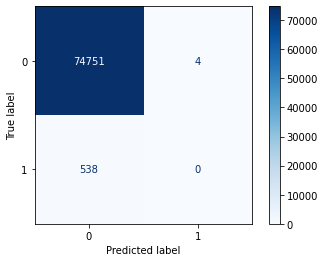

In [79]:
from sklearn import tree

decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=20,
                                            min_samples_leaf=10,
                                            max_depth = 30,
                                            class_weight={0:1 , 1:1},
                                            random_state=0)


decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

print(f'Conjunto de datos de validación')
print(f'  Precisión:     { accuracy_score(y_test, y_pred) :0.5f}')
print(f'  Exactitud:     { precision_score(y_test, y_pred, average = "macro") :0.5f}')
print(f'  Exhaustividad: { recall_score(y_test, y_pred, average = "macro") :0.5f}')

print("")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(decision_tree, X_test, y_test, cmap = plt.cm.Blues)

## Random Forest


Conjunto de datos de validación
  Precisión:     0.99285
  Exactitud:     0.49643
  Exhaustividad: 0.50000

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     74755
           1       0.00      0.00      0.00       538

    accuracy                           0.99     75293
   macro avg       0.50      0.50      0.50     75293
weighted avg       0.99      0.99      0.99     75293



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: 

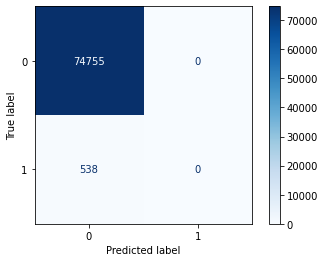

In [80]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators= 1000, 
                                  max_depth=30,
                                  min_samples_leaf = 10, 
                                  min_samples_split= 20,
                                  n_jobs= -1,
                                  random_state=0)
RF_model.fit(X_train, y_train) 

y_pred = RF_model.predict(X_test)

print(f'Conjunto de datos de validación')
print(f'  Precisión:     { accuracy_score(y_test, y_pred) :0.5f}')
print(f'  Exactitud:     { precision_score(y_test, y_pred, average = "macro") :0.5f}')
print(f'  Exhaustividad: { recall_score(y_test, y_pred, average = "macro") :0.5f}')

print("")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(RF_model, X_test, y_test, cmap = plt.cm.Blues)

## Random Forest Balanced 

Conjunto de datos de validación
  Precisión:     0.08520
  Exactitud:     0.50360
  Exhaustividad: 0.53654

              precision    recall  f1-score   support

           0       1.00      0.08      0.15     74755
           1       0.01      0.99      0.02       538

    accuracy                           0.09     75293
   macro avg       0.50      0.54      0.08     75293
weighted avg       0.99      0.09      0.14     75293



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


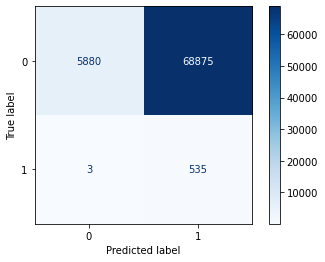

In [81]:
from imblearn.ensemble import BalancedRandomForestClassifier

BRF_model = BalancedRandomForestClassifier(n_estimators= 1000,
                                           max_depth=30,
                                           min_samples_leaf = 10, 
                                           min_samples_split= 20,
                                           random_state=0,
                                           n_jobs= -1,
                                           class_weight= "balanced")

BRF_model.fit(X_train, y_train) 

y_pred = BRF_model.predict(X_test)

print(f'Conjunto de datos de validación')
print(f'  Precisión:     { accuracy_score(y_test, y_pred) :0.5f}')
print(f'  Exactitud:     { precision_score(y_test, y_pred, average = "macro") :0.5f}')
print(f'  Exhaustividad: { recall_score(y_test, y_pred, average = "macro") :0.5f}')

print("")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(BRF_model, X_test, y_test, cmap = plt.cm.Blues)

## AdaBoostClassifier

Conjunto de datos de validación
  Precisión:     0.99285
  Exactitud:     0.49643
  Exhaustividad: 0.50000

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     74755
           1       0.00      0.00      0.00       538

    accuracy                           0.99     75293
   macro avg       0.50      0.50      0.50     75293
weighted avg       0.99      0.99      0.99     75293



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: 

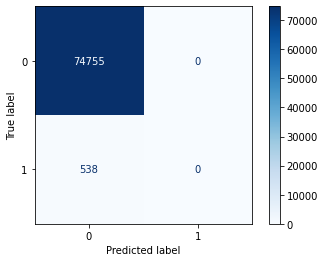

In [82]:
from sklearn.ensemble import AdaBoostClassifier

Ada_model = AdaBoostClassifier(n_estimators=1000,
                               learning_rate =0000.1,
                               random_state =0) 
Ada_model.fit(X_train, y_train) 

y_pred = Ada_model.predict(X_test)

print(f'Conjunto de datos de validación')
print(f'  Precisión:     { accuracy_score(y_test, y_pred) :0.5f}')
print(f'  Exactitud:     { precision_score(y_test, y_pred, average = "macro") :0.5f}')
print(f'  Exhaustividad: { recall_score(y_test, y_pred, average = "macro") :0.5f}')

print("")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(Ada_model, X_test, y_test, cmap = plt.cm.Blues)

#Balanceo con Smote y RandomUnderSampler

##Balanceo de datos con Smote

In [83]:
from imblearn.over_sampling import SMOTE 
X_smote , y_smote = SMOTE().fit_resample(X_train, y_train)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

print('After OverSampling, the shape of train_X: {}'.format(X_smote.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_smote.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_smote == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_smote == 0)))


Before OverSampling, counts of label '1': 2491
Before OverSampling, counts of label '0': 410561 

After OverSampling, the shape of train_X: (821122, 25)
After OverSampling, the shape of train_y: (821122,) 

After OverSampling, counts of label '1': 410561
After OverSampling, counts of label '0': 410561


0    410561
1    410561
Name: ocurrencia, dtype: int64

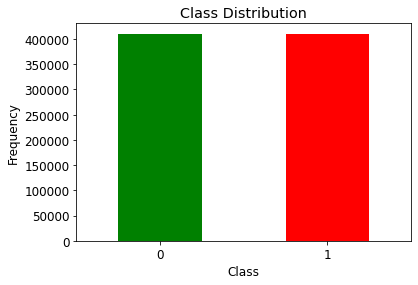

In [84]:
import matplotlib
font = {'size'   : 12}
matplotlib.rc('font', **font)

pd.value_counts(y_smote).plot.bar(rot=0, color=["green", "red"])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')

y_smote.value_counts()

## Balanceo de datos con RandomUnderSampler

In [85]:
from imblearn.under_sampling import RandomUnderSampler

X_rus , y_rus = RandomUnderSampler().fit_resample(X_train, y_train)


print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

print('After OverSampling, the shape of train_X: {}'.format(X_rus.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_rus.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_rus == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_rus == 0)))

Before OverSampling, counts of label '1': 2491
Before OverSampling, counts of label '0': 410561 

After OverSampling, the shape of train_X: (4982, 25)
After OverSampling, the shape of train_y: (4982,) 

After OverSampling, counts of label '1': 2491
After OverSampling, counts of label '0': 2491


0    2491
1    2491
Name: ocurrencia, dtype: int64

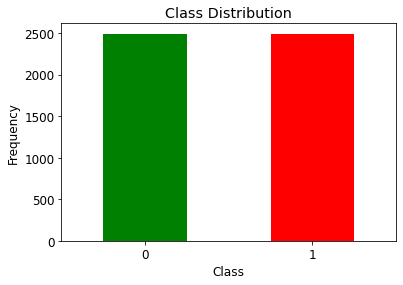

In [86]:
import matplotlib
font = {'size'   : 12}
matplotlib.rc('font', **font)

pd.value_counts(y_rus).plot.bar(rot=0, color=["green", "red"])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')

y_rus.value_counts()

#Modelos con datos balanceados con SMOTE y RUS

##GRID - DecisionTreeClassifier con SMOTE

Conjunto de datos de validación
  Precisión:     0.84835
  Exactitud:     0.50773
  Exhaustividad: 0.63945

              precision    recall  f1-score   support

           0       1.00      0.85      0.92     74755
           1       0.02      0.43      0.04       538

    accuracy                           0.85     75293
   macro avg       0.51      0.64      0.48     75293
weighted avg       0.99      0.85      0.91     75293



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


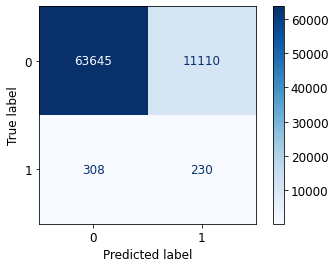

In [103]:
from sklearn import tree

decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=20,
                                            min_samples_leaf=5,
                                            max_depth = 10,
                                            class_weight={0:3, 1:5},
                                            random_state = 0)


decision_tree.fit(X_smote, y_smote)

y_pred = decision_tree.predict(X_test)

print(f'Conjunto de datos de validación')
print(f'  Precisión:     { accuracy_score(y_test, y_pred) :0.5f}')
print(f'  Exactitud:     { precision_score(y_test, y_pred, average = "macro") :0.5f}')
print(f'  Exhaustividad: { recall_score(y_test, y_pred, average = "macro") :0.5f}')

print("")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(decision_tree, X_test, y_test, cmap = plt.cm.Blues)

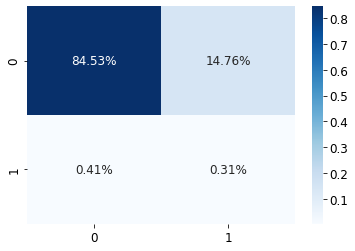

In [104]:
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth' : [30, 50],
              'min_samples_split' : [20, 40, 60],
              'min_samples_leaf' : [5, 10, 15],
              'class_weight':[{0: 0.5, 1: 0.95},{0: 1, 1: 1}]
             }

grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=3, verbose=True)
grid_search.fit(X_smote, y_smote)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [ ]:
final_model = grid_search.best_estimator_
final_model

In [ ]:
final_model.fit(X_smote, y_smote)
y_pred = final_model.predict(X_test)

print(f'Conjunto de datos de validación')
print(f'  Precisión:     { accuracy_score(y_test, y_pred) :0.5f}')
print(f'  Exactitud:     { precision_score(y_test, y_pred, average = "macro") :0.5f}')
print(f'  Exhaustividad: { recall_score(y_test, y_pred, average = "macro") :0.5f}')

print("")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(final_model, X_test, y_test, cmap = plt.cm.Blues)

In [ ]:
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

##GRID - DecisionTreeClassifier con RUS

Conjunto de datos de validación
  Precisión:     0.52000
  Exactitud:     0.50430
  Exhaustividad: 0.65124

              precision    recall  f1-score   support

           0       1.00      0.52      0.68     74755
           1       0.01      0.78      0.02       538

    accuracy                           0.52     75293
   macro avg       0.50      0.65      0.35     75293
weighted avg       0.99      0.52      0.68     75293



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


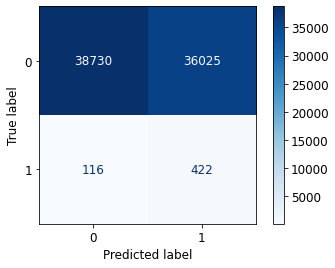

In [87]:
from sklearn import tree

decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=20,
                                            min_samples_leaf=5,
                                            max_depth = 10,
                                            class_weight={0:3, 1:5},
                                            random_state = 0)


decision_tree.fit(X_rus, y_rus)

y_pred = decision_tree.predict(X_test)

print(f'Conjunto de datos de validación')
print(f'  Precisión:     { accuracy_score(y_test, y_pred) :0.5f}')
print(f'  Exactitud:     { precision_score(y_test, y_pred, average = "macro") :0.5f}')
print(f'  Exhaustividad: { recall_score(y_test, y_pred, average = "macro") :0.5f}')

print("")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(decision_tree, X_test, y_test, cmap = plt.cm.Blues)

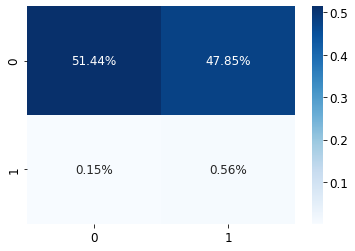

In [88]:
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

In [89]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth' : [30, 50],
              'min_samples_split' : [20, 40, 60],
              'min_samples_leaf' : [5, 10, 15],
              'class_weight':[{0: 0.5, 1: 0.95}, {0: 0.35, 1: 0.65}, {0: 1, 1: 1}]
             }

grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_rus, y_rus)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight={0: 3, 1: 5},
                                              criterion='entropy', max_depth=10,
                                              min_samples_leaf=5,
                                              min_samples_split=20,
                                              random_state=0),
             param_grid={'class_weight': [{0: 0.5, 1: 0.95}, {0: 0.35, 1: 0.65},
                                          {0: 1, 1: 1}],
                         'max_depth': [30, 50], 'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [20, 40, 60]},
             verbose=True)

In [90]:
final_model = grid_search.best_estimator_
final_model

DecisionTreeClassifier(class_weight={0: 1, 1: 1}, criterion='entropy',
                       max_depth=30, min_samples_leaf=15, min_samples_split=60,
                       random_state=0)

Conjunto de datos de validación
  Precisión:     0.65444
  Exactitud:     0.50497
  Exhaustividad: 0.65897

              precision    recall  f1-score   support

           0       1.00      0.65      0.79     74755
           1       0.01      0.66      0.03       538

    accuracy                           0.65     75293
   macro avg       0.50      0.66      0.41     75293
weighted avg       0.99      0.65      0.78     75293



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


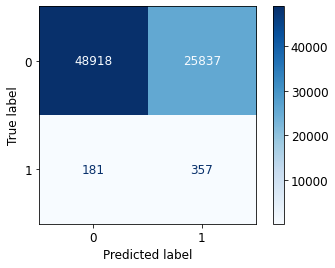

In [91]:
final_model.fit(X_rus, y_rus)

y_pred = final_model.predict(X_test)

print(f'Conjunto de datos de validación')
print(f'  Precisión:     { accuracy_score(y_test, y_pred) :0.5f}')
print(f'  Exactitud:     { precision_score(y_test, y_pred, average = "macro") :0.5f}')
print(f'  Exhaustividad: { recall_score(y_test, y_pred, average = "macro") :0.5f}')

print("")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(final_model, X_test, y_test, cmap = plt.cm.Blues)

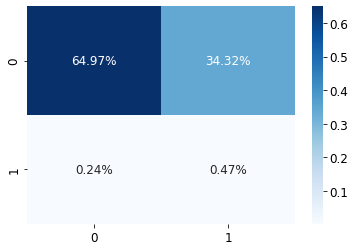

In [92]:
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

##GRID RandomForestClassifier con SMOTE

In [106]:
from sklearn.ensemble import RandomForestClassifier

RF_model_balanced = RandomForestClassifier(n_estimators= 1000, 
                                  max_depth=30,
                                  min_samples_leaf = 10, 
                                  min_samples_split= 20,
                                  n_jobs= -1,
                                  random_state=0)
RF_model_balanced.fit(X_smote, y_smote) 


y_pred = RF_model_balanced.predict(X_test)

print(f'Conjunto de datos de validación')
print(f'  Precisión:     { accuracy_score(y_test, y_pred) :0.5f}')
print(f'  Exactitud:     { precision_score(y_test, y_pred, average = "macro") :0.5f}')
print(f'  Exhaustividad: { recall_score(y_test, y_pred, average = "macro") :0.5f}')

print("")
print(classification_report(y_test, y_pred))

Conjunto de datos de validación
  Precisión:     0.99199
  Exactitud:     0.52385
  Exhaustividad: 0.50326

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     74755
           1       0.05      0.01      0.01       538

    accuracy                           0.99     75293
   macro avg       0.52      0.50      0.50     75293
weighted avg       0.99      0.99      0.99     75293



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


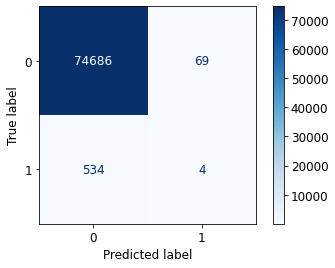

In [107]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(RF_model_balanced, X_test, y_test, cmap = plt.cm.Blues)

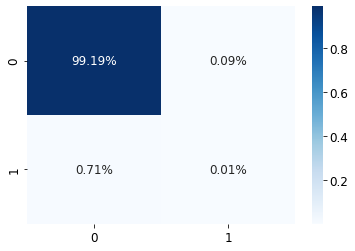

In [108]:
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth' : [10, 30],
              'min_samples_split' : [10, 20 ],
              'min_samples_leaf' : [10, 15],
              'class_weight':[{0: 1, 1: 1}]
             }

grid_search_RF = GridSearchCV(estimator=RF_model, param_grid=param_grid, cv=3, verbose=True)
grid_search_RF.fit(X_smote, y_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [ ]:
final_model_RF = grid_search_RF.best_estimator_
final_model_RF

In [ ]:
final_model_RF.fit(X_smote, y_smote)

y_pred = final_model_RF.predict(X_test)

print(f'Conjunto de datos de validación')
print(f'  Precisión:     { accuracy_score(y_test, y_pred) :0.5f}')
print(f'  Exactitud:     { precision_score(y_test, y_pred, average = "macro") :0.5f}')
print(f'  Exhaustividad: { recall_score(y_test, y_pred, average = "macro") :0.5f}')

print("")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(final_model_RF, X_test, y_test, cmap = plt.cm.Blues)

sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

##GRID RandomForestClassifier con RUS

In [93]:
from sklearn.ensemble import RandomForestClassifier

RF_model_rus= RandomForestClassifier(n_estimators= 1000, 
                                  max_depth=30,
                                  min_samples_leaf = 10, 
                                  min_samples_split= 20,
                                  n_jobs= -1,
                                  random_state=0)
RF_model_rus.fit(X_rus, y_rus) 

y_pred = RF_model_rus.predict(X_test)

print(f'Conjunto de datos de validación')
print(f'  Precisión:     { accuracy_score(y_test, y_pred) :0.5f}')
print(f'  Exactitud:     { precision_score(y_test, y_pred, average = "macro") :0.5f}')
print(f'  Exhaustividad: { recall_score(y_test, y_pred, average = "macro") :0.5f}')

print("")
print(classification_report(y_test, y_pred))

Conjunto de datos de validación
  Precisión:     0.70226
  Exactitud:     0.50686
  Exhaustividad: 0.70335

              precision    recall  f1-score   support

           0       1.00      0.70      0.82     74755
           1       0.02      0.70      0.03       538

    accuracy                           0.70     75293
   macro avg       0.51      0.70      0.43     75293
weighted avg       0.99      0.70      0.82     75293



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


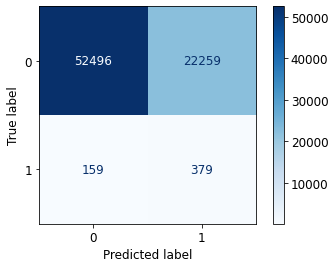

In [94]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(RF_model_rus, X_test, y_test, cmap = plt.cm.Blues)

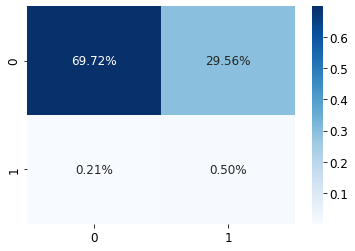

In [95]:
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

In [96]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth' : [30, 50, 100],
              'min_samples_split' : [20, 40, 60],
              'min_samples_leaf' : [5, 10, 15],
              'class_weight':[{0: 0.5, 1: 0.95}, {0: 0.35, 1: 0.65}, {0: 0.65, 1: 0.35}]
             }

grid_search_RF = GridSearchCV(estimator=RF_model, param_grid=param_grid, cv=3, verbose=True)
grid_search_RF.fit(X_rus, y_rus)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=30, min_samples_leaf=10,
                                              min_samples_split=20,
                                              n_estimators=1000, n_jobs=-1,
                                              random_state=0),
             param_grid={'class_weight': [{0: 0.5, 1: 0.95}, {0: 0.35, 1: 0.65},
                                          {0: 0.65, 1: 0.35}],
                         'max_depth': [30, 50, 100],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [20, 40, 60]},
             verbose=True)

In [97]:
final_model_RF_rus = grid_search_RF.best_estimator_
final_model_RF_rus

RandomForestClassifier(class_weight={0: 0.35, 1: 0.65}, max_depth=30,
                       min_samples_leaf=5, min_samples_split=20,
                       n_estimators=1000, n_jobs=-1, random_state=0)

Conjunto de datos de validación
  Precisión:     0.58065
  Exactitud:     0.50574
  Exhaustividad: 0.69747

              precision    recall  f1-score   support

           0       1.00      0.58      0.73     74755
           1       0.01      0.82      0.03       538

    accuracy                           0.58     75293
   macro avg       0.51      0.70      0.38     75293
weighted avg       0.99      0.58      0.73     75293



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


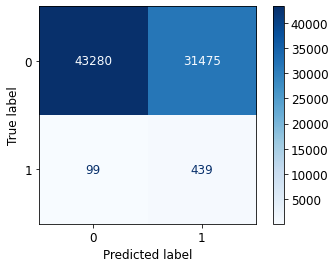

In [98]:
final_model_RF_rus.fit(X_rus, y_rus)

y_pred = final_model_RF_rus.predict(X_test)

print(f'Conjunto de datos de validación')
print(f'  Precisión:     { accuracy_score(y_test, y_pred) :0.5f}')
print(f'  Exactitud:     { precision_score(y_test, y_pred, average = "macro") :0.5f}')
print(f'  Exhaustividad: { recall_score(y_test, y_pred, average = "macro") :0.5f}')

print("")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(final_model_RF_rus, X_test, y_test, cmap = plt.cm.Blues)

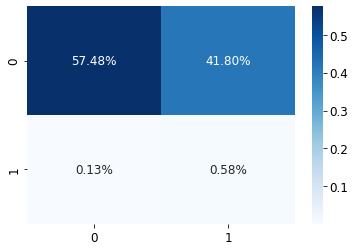

In [99]:
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

##BalancedRandomForestClassifier con RUS

Conjunto de datos de validación
  Precisión:     0.70239
  Exactitud:     0.50680
  Exhaustividad: 0.70157

              precision    recall  f1-score   support

           0       1.00      0.70      0.82     74755
           1       0.02      0.70      0.03       538

    accuracy                           0.70     75293
   macro avg       0.51      0.70      0.43     75293
weighted avg       0.99      0.70      0.82     75293



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


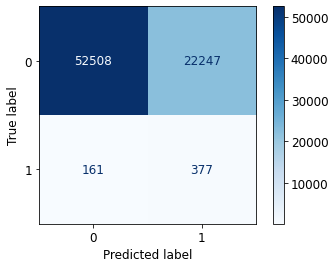

In [100]:
from imblearn.ensemble import BalancedRandomForestClassifier

BRF_model_balanced_rus = BalancedRandomForestClassifier(n_estimators= 1000,
                                           max_depth=30,
                                           min_samples_leaf = 10, 
                                           min_samples_split= 20,
                                           random_state=0,
                                           n_jobs= -1)

BRF_model_balanced_rus.fit(X_rus, y_rus) 

y_pred = BRF_model_balanced_rus.predict(X_test)

print(f'Conjunto de datos de validación')
print(f'  Precisión:     { accuracy_score(y_test, y_pred) :0.5f}')
print(f'  Exactitud:     { precision_score(y_test, y_pred, average = "macro") :0.5f}')
print(f'  Exhaustividad: { recall_score(y_test, y_pred, average = "macro") :0.5f}')

print("")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(BRF_model_balanced_rus, X_test, y_test, cmap = plt.cm.Blues)

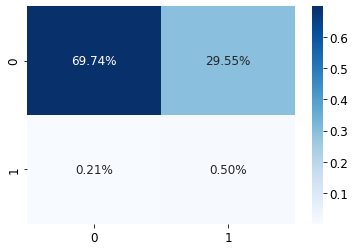

In [101]:
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

##AdaBoostClassifier con SMOTE


Conjunto de datos de validación
  Precisión:     0.94265
  Exactitud:     0.51100
  Exhaustividad: 0.57806

              precision    recall  f1-score   support

           0       0.99      0.95      0.97     74755
           1       0.03      0.21      0.05       538

    accuracy                           0.94     75293
   macro avg       0.51      0.58      0.51     75293
weighted avg       0.99      0.94      0.96     75293



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


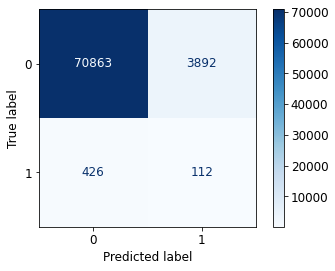

In [104]:
from sklearn.ensemble import AdaBoostClassifier

Ada_model_smote = AdaBoostClassifier(n_estimators=100) 
Ada_model_smote.fit(X_smote, y_smote) 

y_pred = Ada_model_smote.predict(X_test)

print(f'Conjunto de datos de validación')
print(f'  Precisión:     { accuracy_score(y_test, y_pred) :0.5f}')
print(f'  Exactitud:     { precision_score(y_test, y_pred, average = "macro") :0.5f}')
print(f'  Exhaustividad: { recall_score(y_test, y_pred, average = "macro") :0.5f}')

print("")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(Ada_model_smote, X_test, y_test, cmap = plt.cm.Blues)

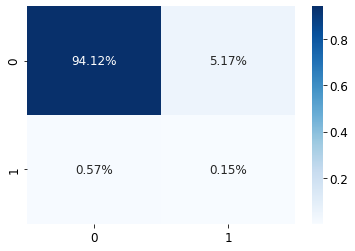

In [105]:
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

##AdaBoostClassifier con RUS

Conjunto de datos de validación
  Precisión:     0.69705
  Exactitud:     0.50662
  Exhaustividad: 0.69796

              precision    recall  f1-score   support

           0       1.00      0.70      0.82     74755
           1       0.02      0.70      0.03       538

    accuracy                           0.70     75293
   macro avg       0.51      0.70      0.43     75293
weighted avg       0.99      0.70      0.81     75293



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


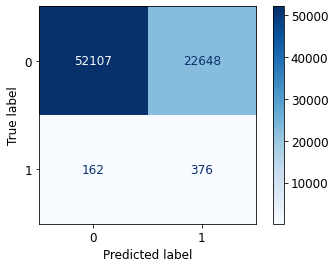

In [102]:
from sklearn.ensemble import AdaBoostClassifier

Ada_model_rus = AdaBoostClassifier(n_estimators=100) 
Ada_model_rus.fit(X_rus, y_rus) 

y_pred = Ada_model_rus.predict(X_test)

print(f'Conjunto de datos de validación')
print(f'  Precisión:     { accuracy_score(y_test, y_pred) :0.5f}')
print(f'  Exactitud:     { precision_score(y_test, y_pred, average = "macro") :0.5f}')
print(f'  Exhaustividad: { recall_score(y_test, y_pred, average = "macro") :0.5f}')

print("")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(Ada_model_rus, X_test, y_test, cmap = plt.cm.Blues)

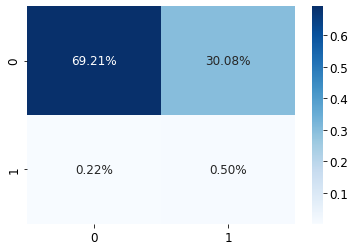

In [103]:
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

# Guardamos ambos DF en csv

In [ ]:
df_all.shape, df_sin_movilidad.shape, df_all_20_21.shape, df_sin_movilidad_20_21.shape

In [ ]:
df_all.head()

In [ ]:
df_sin_movilidad.head()

In [ ]:
df_all_20_21.head()

In [ ]:
df_sin_movilidad_20_21.head()

In [ ]:
df_all.to_csv("/content/drive/MyDrive/TFM/datos/df_all.csv", sep=";")

In [ ]:
df_sin_movilidad.to_csv("/content/drive/MyDrive/TFM/datos/df_sin_movilidad.csv", sep=";")

In [ ]:
df_all_20_21.to_csv("/content/drive/MyDrive/TFM/datos/df_all_20_21.csv", sep=";")

In [ ]:
df_sin_movilidad_20_21.to_csv("/content/drive/MyDrive/TFM/datos/df_sin_movilidad_20_21.csv", sep=";")